In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib  # For saving the model
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

Null values in the dataset:
Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
Family History with Overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64


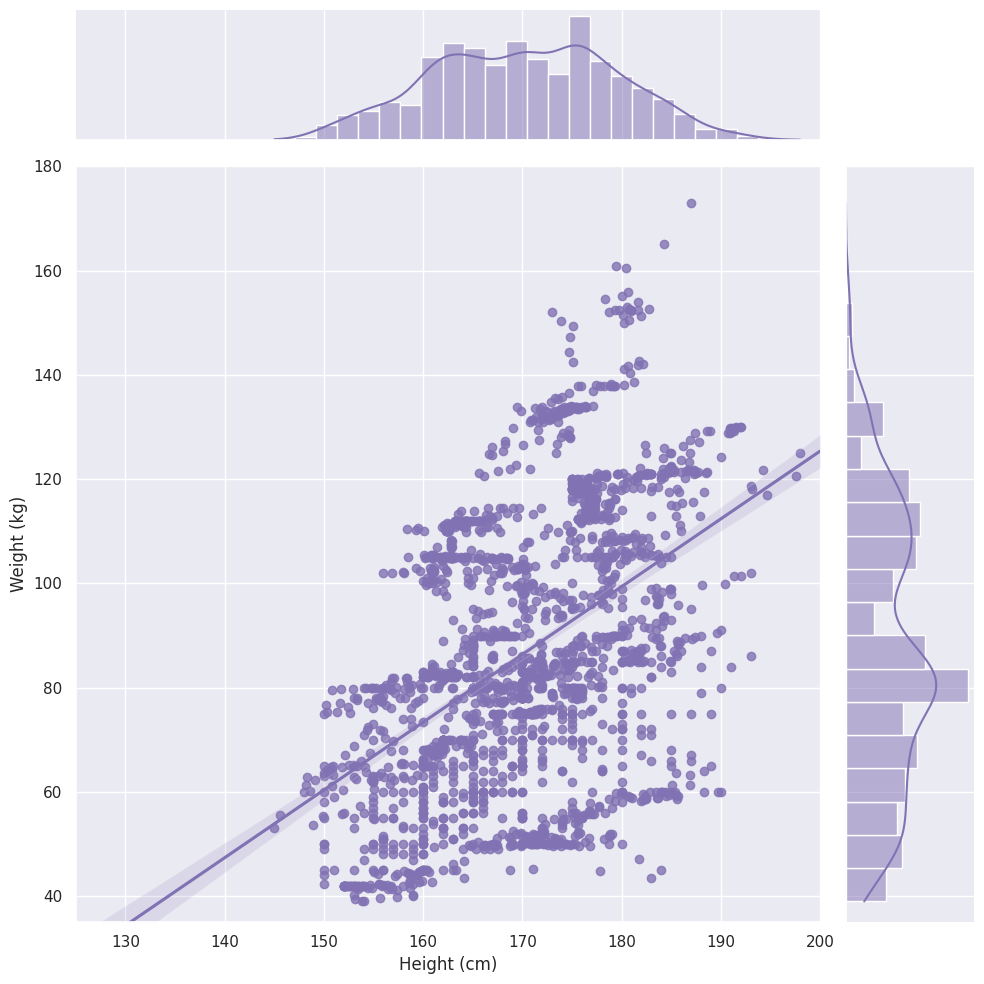

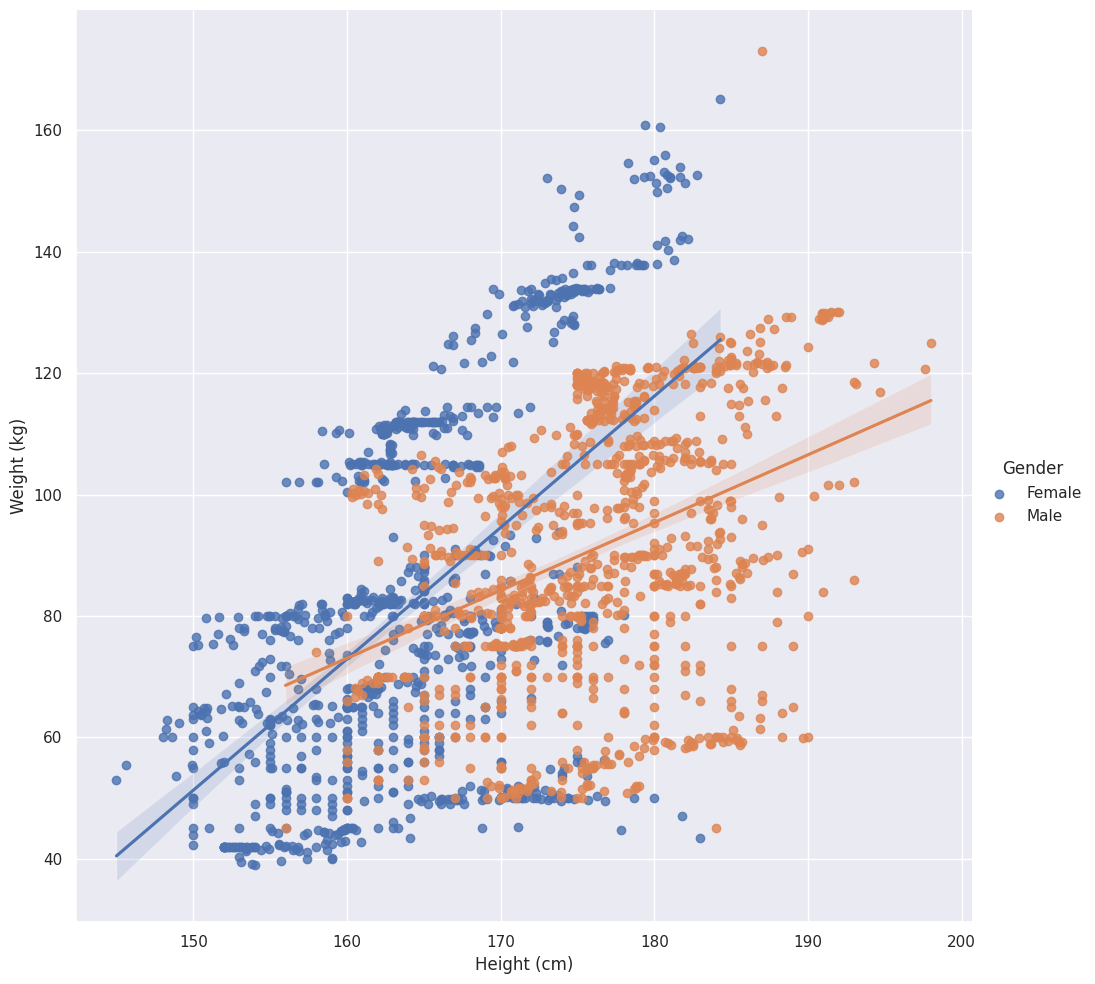

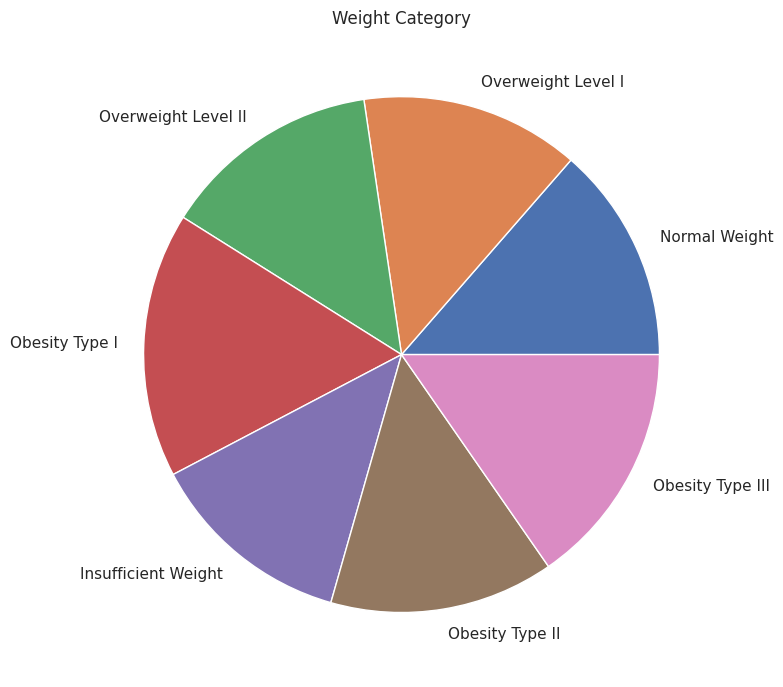

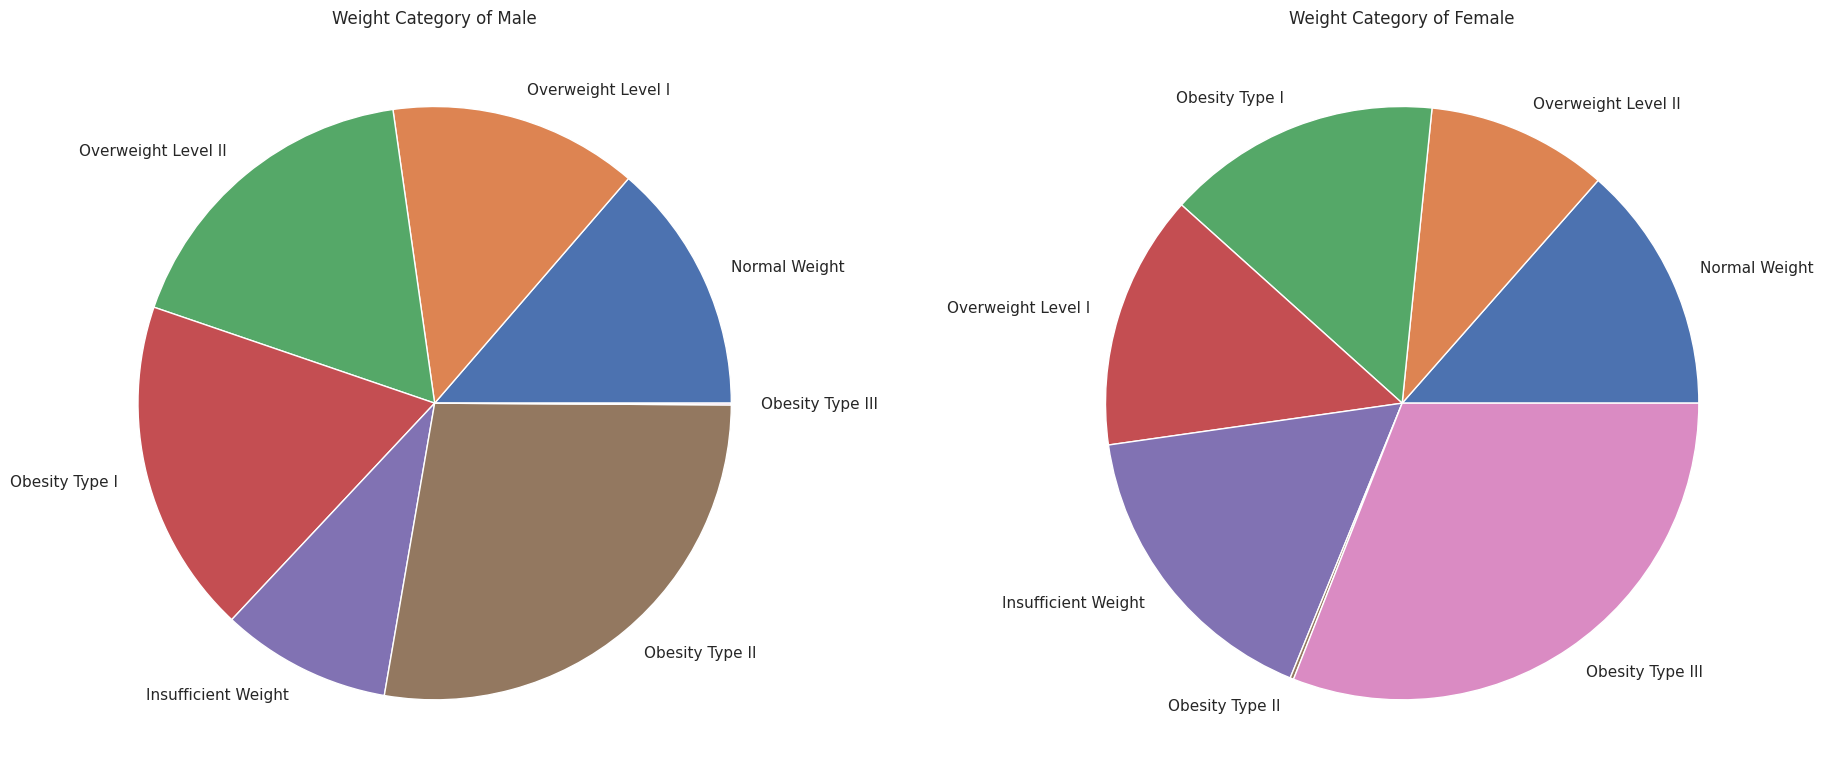

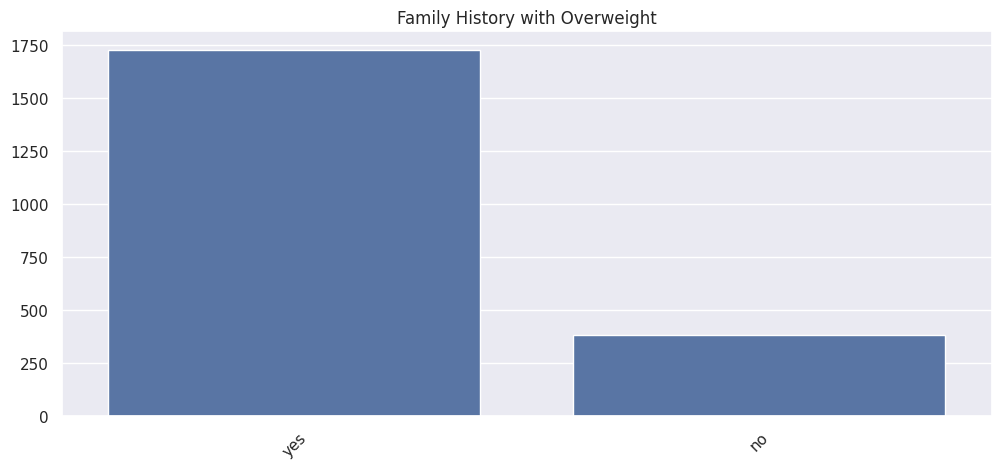

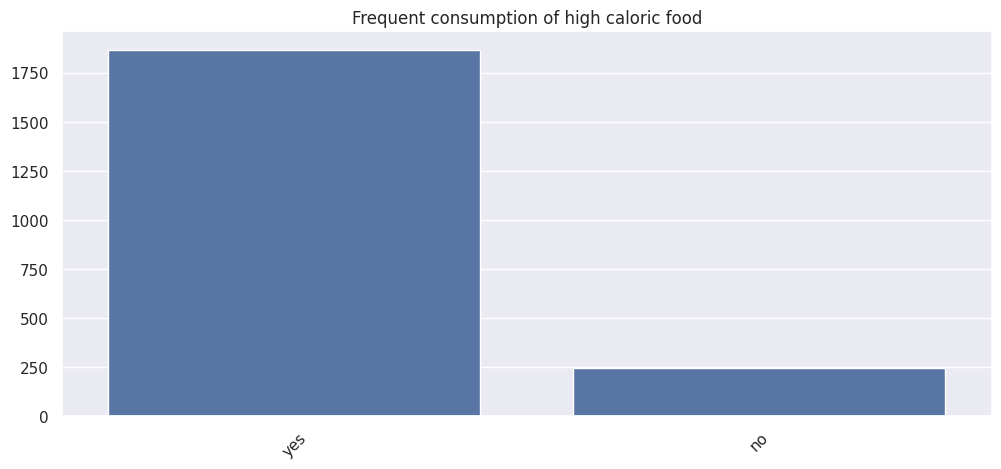

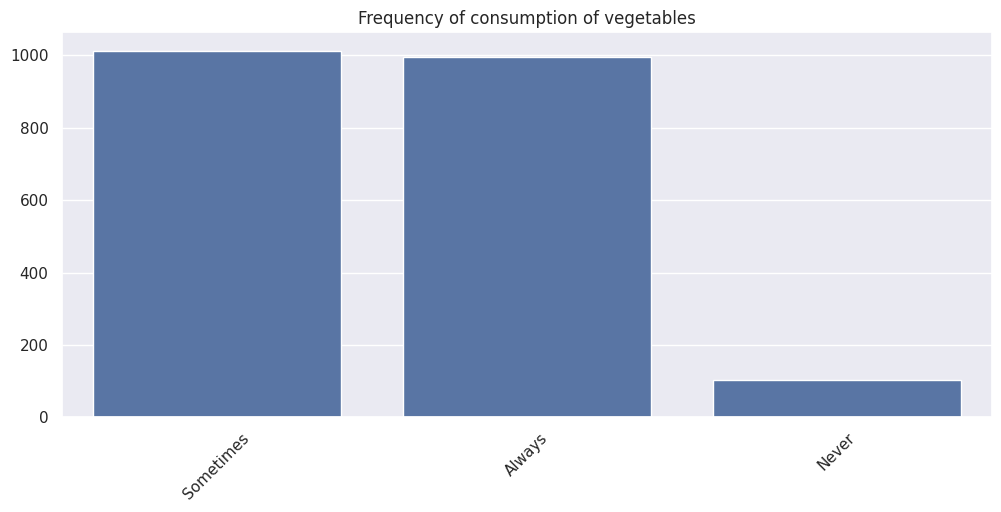

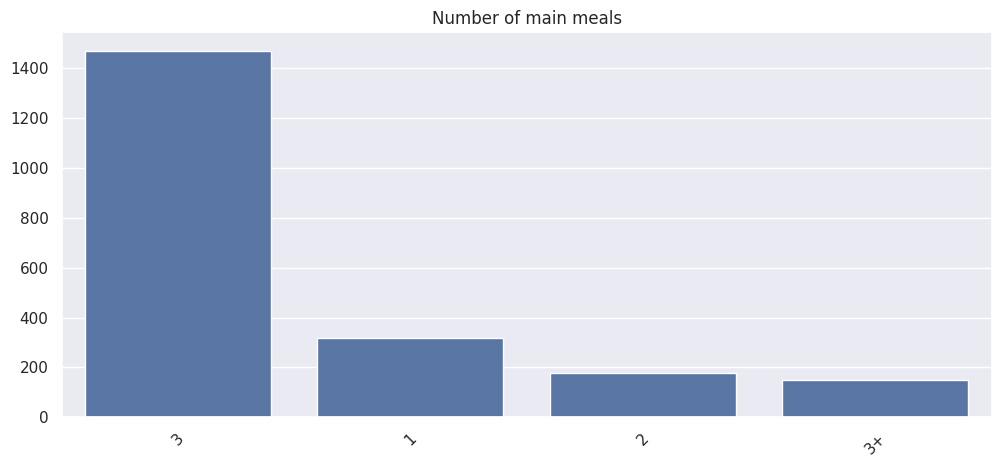

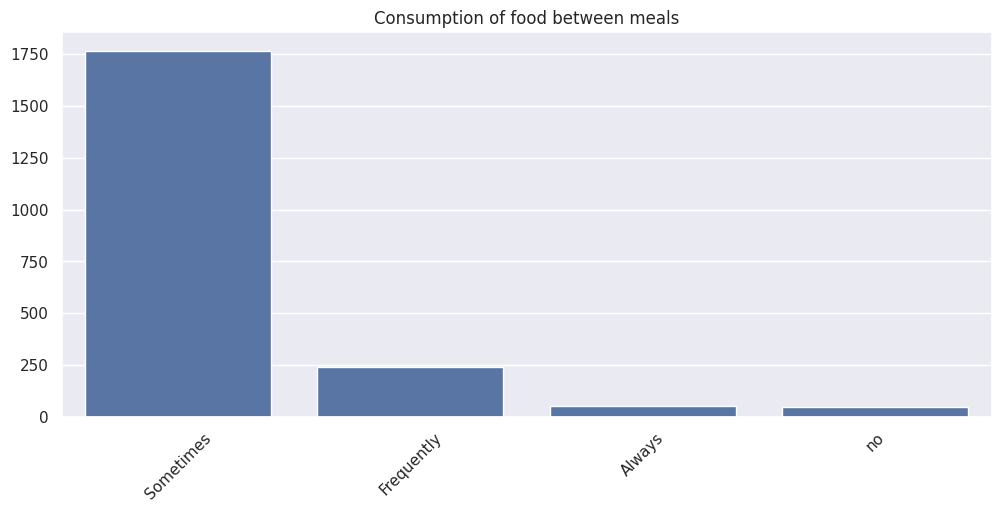

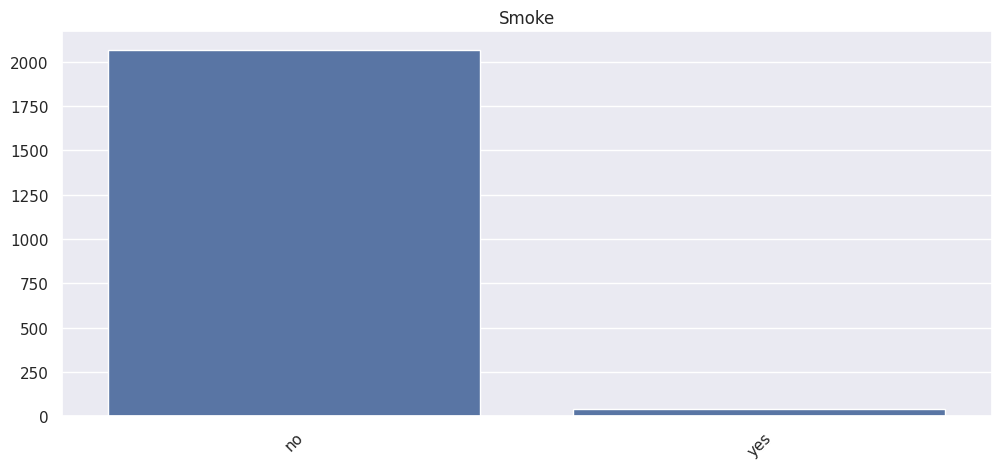

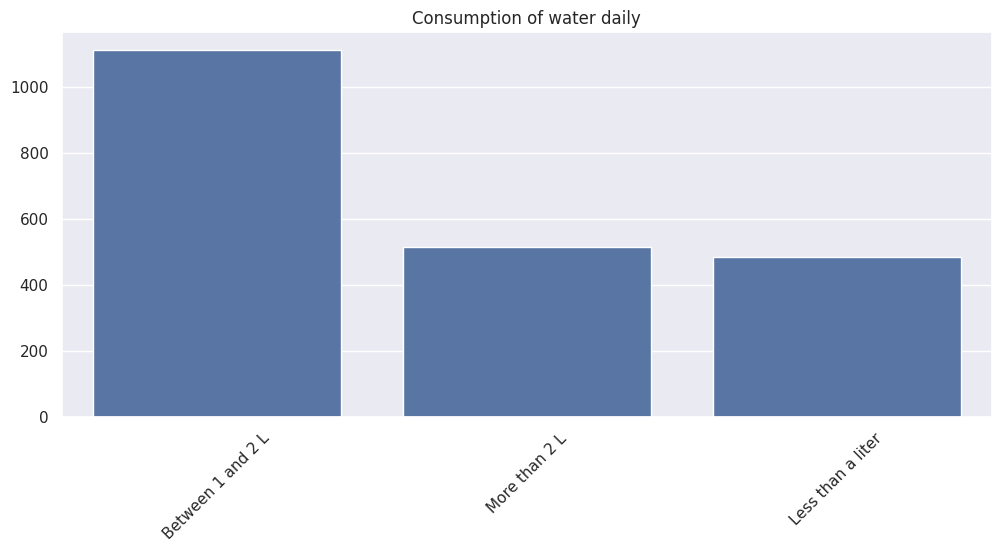

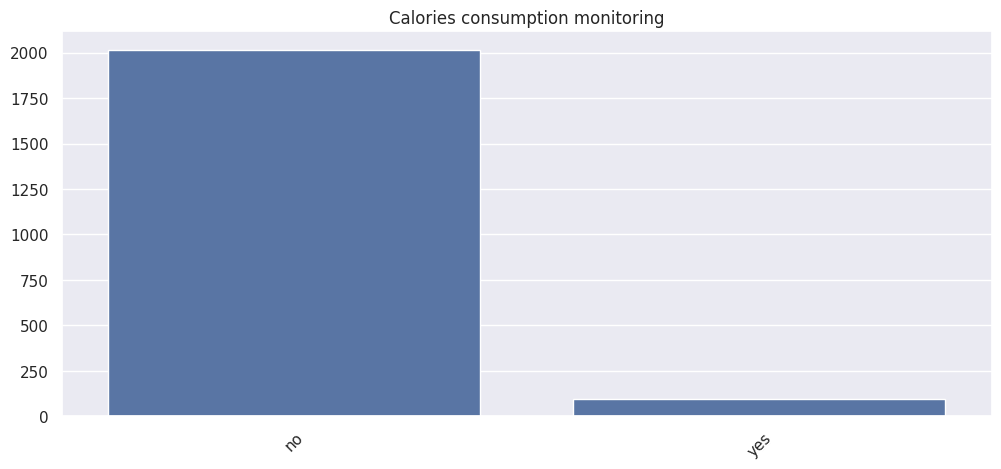

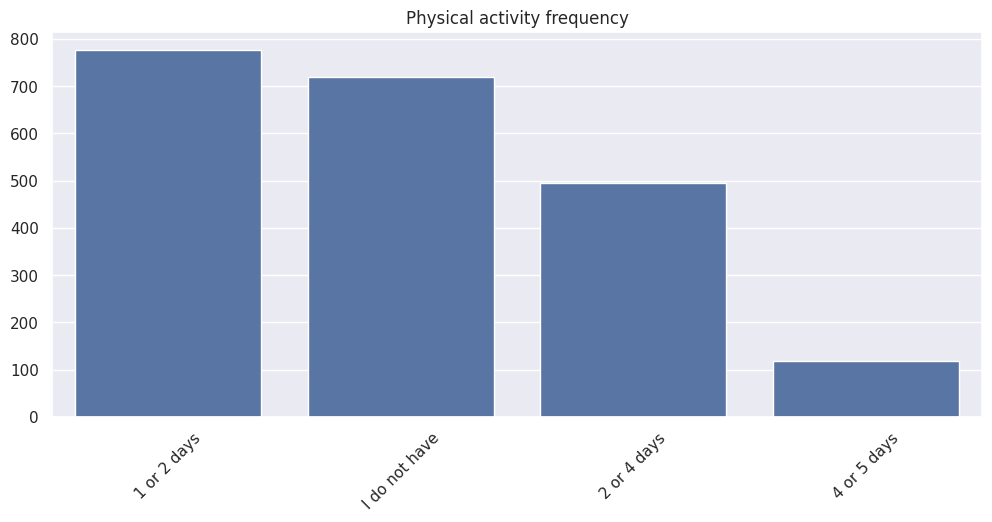

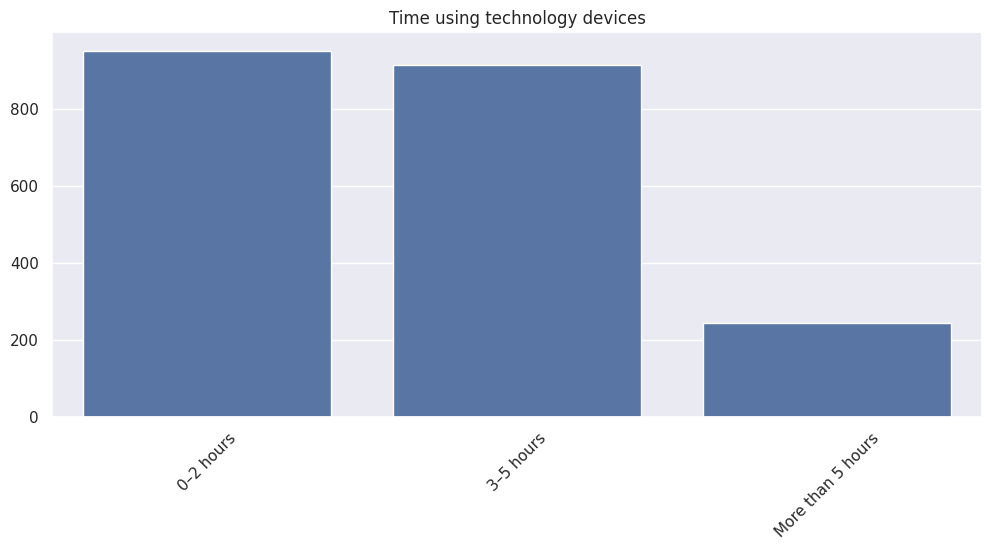

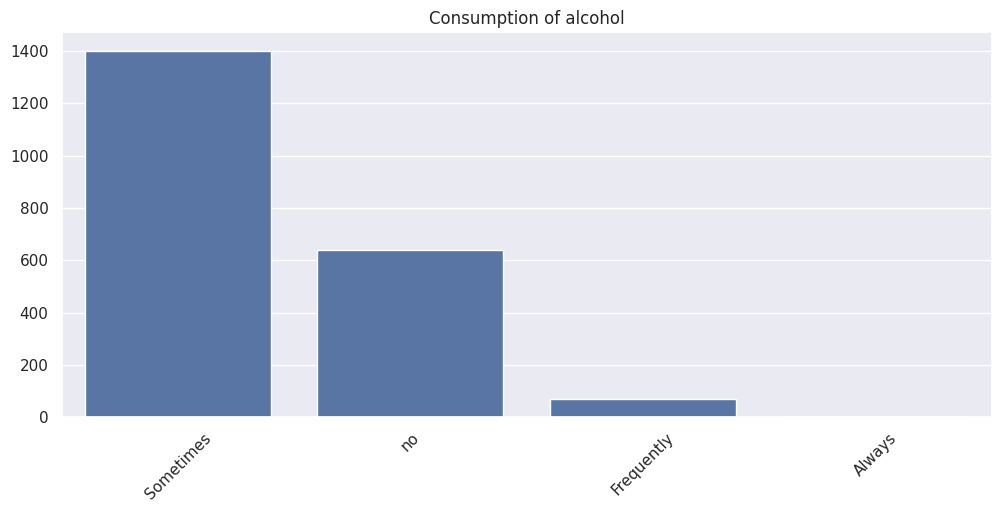

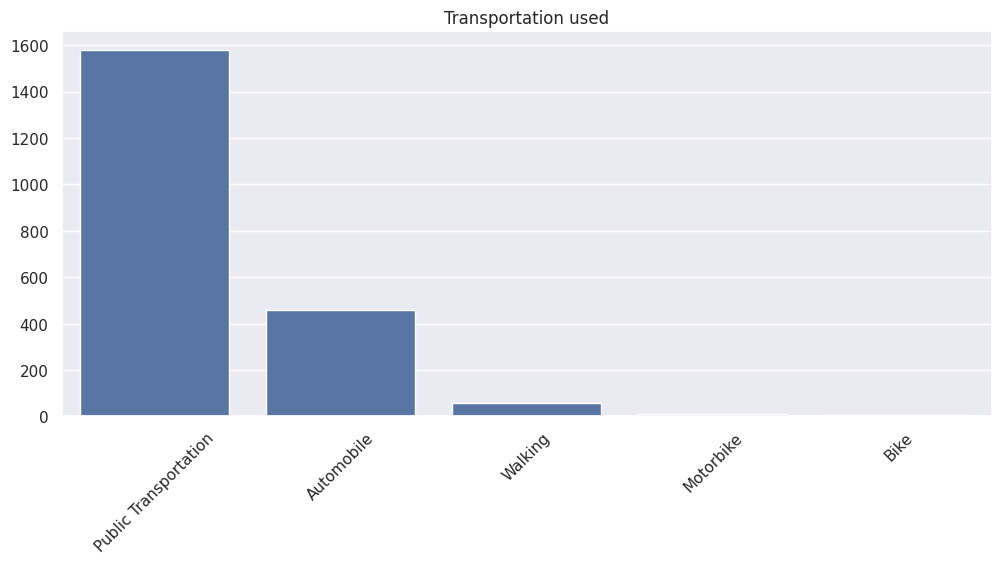


Class Distribution of 'Obesity':
 Obesity
Obesity Type I         351
Obesity Type III       324
Obesity Type II        297
Overweight Level I     290
Overweight Level II    290
Normal Weight          287
Insufficient Weight    272
Name: count, dtype: int64


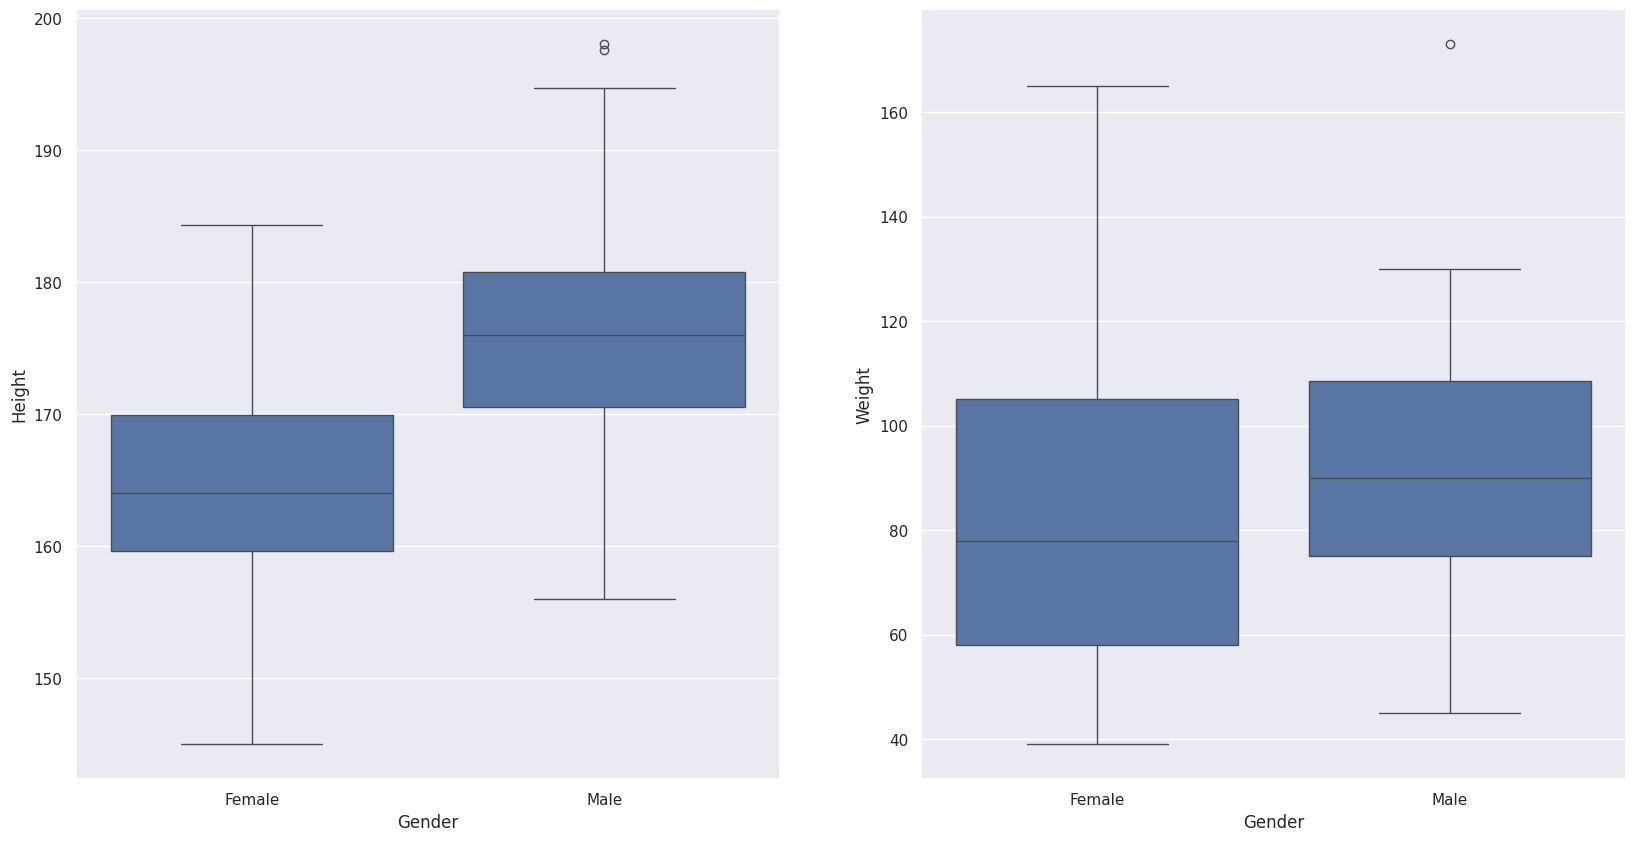

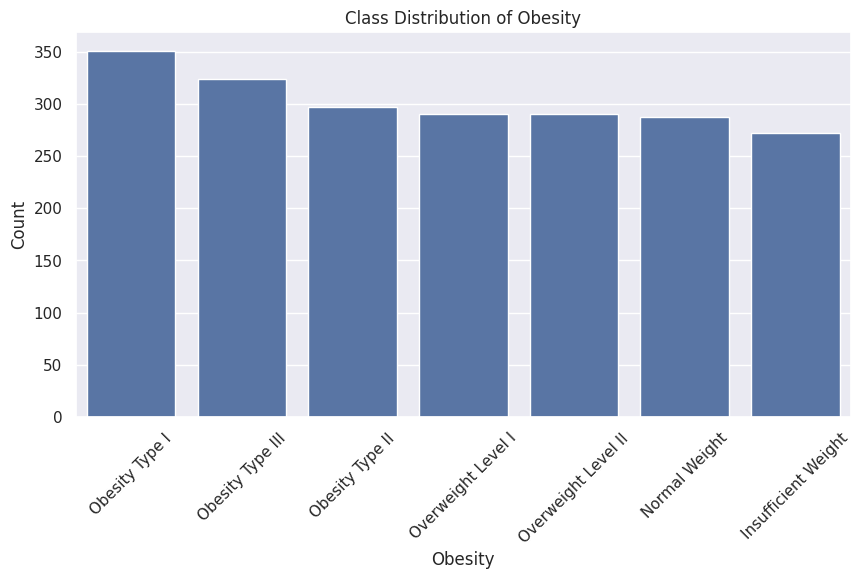

Training Accuracy: 98.05%
Testing Accuracy: 92.91%

Classification Report:
                      precision    recall  f1-score   support

Insufficient Weight       0.95      0.98      0.96        56
      Normal Weight       0.86      0.79      0.82        62
     Obesity Type I       0.96      0.95      0.95        78
    Obesity Type II       0.97      0.97      0.97        58
   Obesity Type III       1.00      1.00      1.00        63
 Overweight Level I       0.83      0.88      0.85        56
Overweight Level II       0.92      0.94      0.93        50

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423



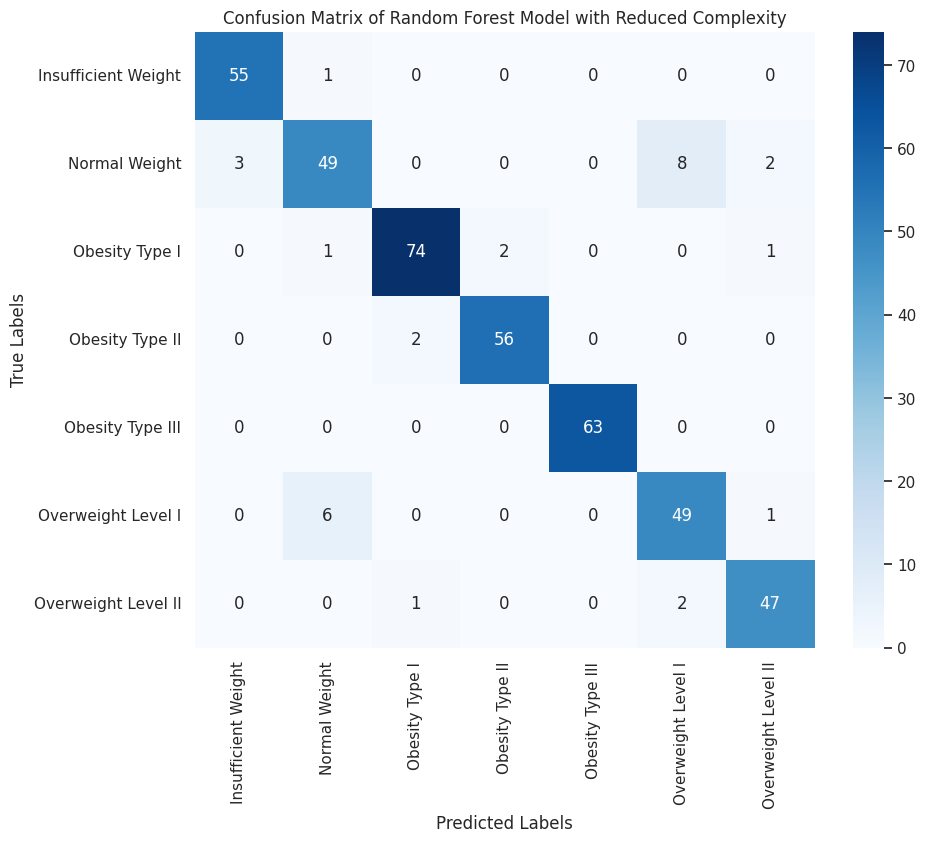

Predicted Obesity Category: Obesity Type III


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib  # For saving the model
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')

# Renaming columns for readability
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
              'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables',
              'Number of main meals', 'Consumption of food between meals', 'Smoke',
              'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency',
              'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity']

# Replacing underscores with spaces in some columns
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))

# Converting Height to cm and rounding numerical values
df['Height'] = df['Height'] * 100
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(1)

# Checking for null values
print("Null values in the dataset:")
print(df.isnull().sum())

# Round relevant columns
for x in ['Frequency of consumption of vegetables', 'Number of main meals',
          'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    df[x] = df[x].apply(round)

# Replacing numerical values with categorical mappings
mapping0 = {1: 'Never', 2: 'Sometimes', 3: 'Always'}
mapping1 = {1: '1', 2: '2', 3: '3', 4: '3+'}
mapping2 = {1: 'Less than a liter', 2: 'Between 1 and 2 L', 3: 'More than 2 L'}
mapping3 = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
mapping4 = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}

df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(mapping0)
df['Number of main meals'] = df['Number of main meals'].replace(mapping1)
df['Consumption of water daily'] = df['Consumption of water daily'].replace(mapping2)
df['Physical activity frequency'] = df['Physical activity frequency'].replace(mapping3)
df['Time using technology devices'] = df['Time using technology devices'].replace(mapping4)

# Visualization: Height vs Weight
sns.set()
g = sns.jointplot(x="Height", y="Weight", data=df, kind="reg", truncate=False, xlim=(125, 200), ylim=(35, 180), color="m", height=10)
g.set_axis_labels("Height (cm)", "Weight (kg)")

# Visualization: Height vs Weight by Gender
g = sns.lmplot(x="Height", y="Weight", hue="Gender", height=10, data=df)
g.set_axis_labels("Height (cm)", "Weight (kg)")

# Pie Chart of Obesity
c = Counter(df['Obesity'])
fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct=None)
plt.title('Weight Category')
plt.tight_layout()

# Pie Charts by Gender
filt = df['Gender'] == 'Male'
c_m = Counter(df.loc[filt, 'Obesity'])
c_f = Counter(df.loc[~filt, 'Obesity'])

fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.pie([float(c_m[v]) for v in c_m], labels=[str(k) for k in c_m], autopct=None)
plt.title('Weight Category of Male')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.pie([float(c_f[v]) for v in c_f], labels=[str(k) for k in c_f], autopct=None)
plt.title('Weight Category of Female')
plt.tight_layout()

# Bar Plots for Eating and Exercise Habits
for a in df.columns[4:-1]:
    data = df[a].value_counts()
    values = df[a].value_counts().index.to_list()
    counts = df[a].value_counts().to_list()

    plt.figure(figsize=(12,5))
    ax = sns.barplot(x=values, y=counts)

    plt.title(a)
    plt.xticks(rotation=45)
    plt.show()

# Boxplots for Gender vs Height and Weight
sns.set()
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight', data=df)

# Checking class imbalance for 'Obesity'
obesity_counts = df['Obesity'].value_counts()
print("\nClass Distribution of 'Obesity':\n", obesity_counts)

# Plotting the class distribution for 'Obesity'
plt.figure(figsize=(10,5))
sns.barplot(x=obesity_counts.index, y=obesity_counts.values)
plt.title("Class Distribution of Obesity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Create a dictionary to store separate LabelEncoders for each categorical column
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # Store the encoder for each categorical column

# Split the data into features and target variable
X = df.drop('Obesity', axis=1)  # Features
y = df['Obesity']  # Target variable

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier model with reduced complexity
rf_classifier = RandomForestClassifier(
    n_estimators=50,                # Reduce the number of trees
    max_depth=10,                   # Limit the maximum depth of the trees
    max_features='sqrt',            # Limit the number of features used to split each node
    min_samples_split=4,            # Increase the minimum samples required to split a node
    min_samples_leaf=4,             # Increase the minimum samples required to be at a leaf node
    random_state=42
)
rf_classifier.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, target_names=label_encoders['Obesity'].classes_)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print training and testing accuracy
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

# Print classification report
print("\nClassification Report:\n", class_report)

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Obesity'].classes_, yticklabels=label_encoders['Obesity'].classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Random Forest Model with Reduced Complexity")
plt.show()

# Save the model and label encoders for future use
joblib.dump(rf_classifier, 'random_forest_obesity_model.pkl')  # Save the model
joblib.dump(label_encoders, 'label_encoders.pkl')  # Save the label encoders

# Function to make predictions for new input data
def predict_obesity(input_data):
    """
    Predicts the Obesity category for the given input data.

    Parameters:
    input_data (list): A list of feature values in the same order as the dataset.

    Returns:
    str: Predicted Obesity category.
    """
    # Convert the input data into a DataFrame
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Encode categorical variables in the input data using saved encoders
    for column in input_df.columns:
        if column in label_encoders:
            try:
                # Transform the input data using the corresponding label encoder
                input_df[column] = label_encoders[column].transform([input_df[column][0]])
            except ValueError as e:
                print(f"Error: {e}")
                print(f"'{input_df[column][0]}' is not a recognized category for column '{column}'.")

    # Make the prediction
    prediction = rf_classifier.predict(input_df)

    # Return the decoded prediction
    return label_encoders['Obesity'].inverse_transform(prediction)[0]

# Example new input for prediction
new_input =  ['Female', 21, 171.1, 131.4, 'yes', 'yes', 'Always', '3', 'Sometimes', 'no', 'Between 1 and 2 L',
             'no', '2 or 4 days', '3–5 hours', 'Sometimes', 'Public Transportation']


# Make the prediction
predicted_obesity = predict_obesity(new_input)
print(f"Predicted Obesity Category: {predicted_obesity}")


Actual Output

Null values in the dataset:
Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
Family History with Overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64
Training Accuracy: 98.05%
Testing Accuracy: 92.91%

Classification Report:
                      precision    recall  f1-score   support

Insufficient Weight   

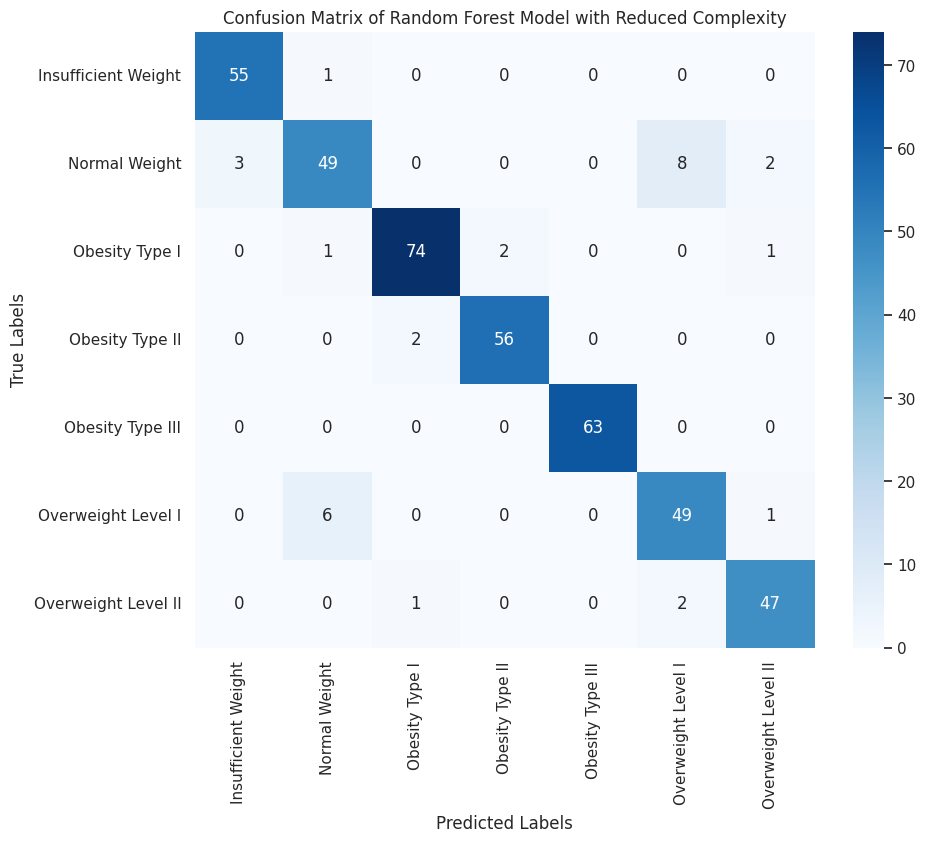

Predicted Obesity Category: Normal Weight
Error: y contains previously unseen labels: 0.0
'0.0' is not a recognized category for column 'Gender'.
Error: y contains previously unseen labels: 1.0
'1.0' is not a recognized category for column 'Family History with Overweight'.
Error: y contains previously unseen labels: 0.0
'0.0' is not a recognized category for column 'Frequent consumption of high caloric food'.
Error: y contains previously unseen labels: 2.0
'2.0' is not a recognized category for column 'Frequency of consumption of vegetables'.
Error: y contains previously unseen labels: 2.0
'2.0' is not a recognized category for column 'Number of main meals'.
Error: y contains previously unseen labels: 2.0
'2.0' is not a recognized category for column 'Consumption of food between meals'.
Error: y contains previously unseen labels: 0.0
'0.0' is not a recognized category for column 'Smoke'.
Error: y contains previously unseen labels: 0.0
'0.0' is not a recognized category for column 'Cons

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib  # For saving the model
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')

# Renaming columns for readability
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
              'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables',
              'Number of main meals', 'Consumption of food between meals', 'Smoke',
              'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency',
              'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity']

# Replacing underscores with spaces in some columns
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))

# Converting Height to cm and rounding numerical values
df['Height'] = df['Height'] * 100
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(1)

# Checking for null values
print("Null values in the dataset:")
print(df.isnull().sum())

# Round relevant columns
for x in ['Frequency of consumption of vegetables', 'Number of main meals',
          'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    df[x] = df[x].apply(round)

# Replacing numerical values with categorical mappings
mapping0 = {1: 'Never', 2: 'Sometimes', 3: 'Always'}
mapping1 = {1: '1', 2: '2', 3: '3', 4: '3+'}
mapping2 = {1: 'Less than a liter', 2: 'Between 1 and 2 L', 3: 'More than 2 L'}
mapping3 = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
mapping4 = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}

df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(mapping0)
df['Number of main meals'] = df['Number of main meals'].replace(mapping1)
df['Consumption of water daily'] = df['Consumption of water daily'].replace(mapping2)
df['Physical activity frequency'] = df['Physical activity frequency'].replace(mapping3)
df['Time using technology devices'] = df['Time using technology devices'].replace(mapping4)

# Create a dictionary to store separate LabelEncoders for each categorical column
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # Store the encoder for each categorical column

# Split the data into features and target variable
X = df.drop('Obesity', axis=1)  # Features
y = df['Obesity']  # Target variable

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier model with reduced complexity
rf_classifier = RandomForestClassifier(
    n_estimators=50,                # Reduce the number of trees
    max_depth=10,                   # Limit the maximum depth of the trees
    max_features='sqrt',            # Limit the number of features used to split each node
    min_samples_split=4,            # Increase the minimum samples required to split a node
    min_samples_leaf=4,             # Increase the minimum samples required to be at a leaf node
    random_state=42
)
rf_classifier.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, target_names=label_encoders['Obesity'].classes_)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print training and testing accuracy
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

# Print classification report
print("\nClassification Report:\n", class_report)

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Obesity'].classes_, yticklabels=label_encoders['Obesity'].classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Random Forest Model with Reduced Complexity")
plt.show()

# Save the model and label encoders for future use
joblib.dump(rf_classifier, 'random_forest_obesity_model.pkl')  # Save the model
joblib.dump(label_encoders, 'label_encoders.pkl')  # Save the label encoders

# Function to make predictions for new input data
def predict_obesity(input_data):
    """
    Predicts the Obesity category for the given input data.

    Parameters:
    input_data (list): A list of feature values in the same order as the dataset.

    Returns:
    str: Predicted Obesity category.
    """
    # Convert the input data into a DataFrame
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Encode categorical variables in the input data using saved encoders
    for column in input_df.columns:
        if column in label_encoders:
            try:
                # Transform the input data using the corresponding label encoder
                input_df[column] = label_encoders[column].transform([input_df[column][0]])
            except ValueError as e:
                print(f"Error: {e}")
                print(f"'{input_df[column][0]}' is not a recognized category for column '{column}'.")

    # Make the prediction
    prediction = rf_classifier.predict(input_df)

    # Return the decoded prediction
    return label_encoders['Obesity'].inverse_transform(prediction)[0]

# Example new input for prediction
new_input = [	'Female',	21.0,	162.0,	64.0,	'yes',	'no',	'Sometimes',	'3',	'Sometimes',	'no',	'Between 1 and 2 L',	'no',	'I do not have',	'3–5 hours',	'no',	'Public Transportation'	]

# Make the prediction
predicted_obesity = predict_obesity(new_input)
print(f"Predicted Obesity Category: {predicted_obesity}")

# New part to get actual output from the dataset
def predict_from_dataset(index):
    """
    Predicts the obesity category for an instance in the dataset based on its index.

    Parameters:
    index (int): The index of the instance in the dataset.

    Returns:
    str: Predicted Obesity category for the instance.
    """
    input_data = df.iloc[index].drop('Obesity').tolist()  # Extract features for the specific instance
    return predict_obesity(input_data)

# Example: Predict from dataset
index = 0  # Change index as needed to test different rows from the dataset
predicted_obesity_from_dataset = predict_from_dataset(index)
print(f"Predicted Obesity Category for dataset instance at index {index}: {predicted_obesity_from_dataset}")


Random Forest & Logistic Regression
 - Correct code

Null values in the dataset:
Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
Family History with Overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64


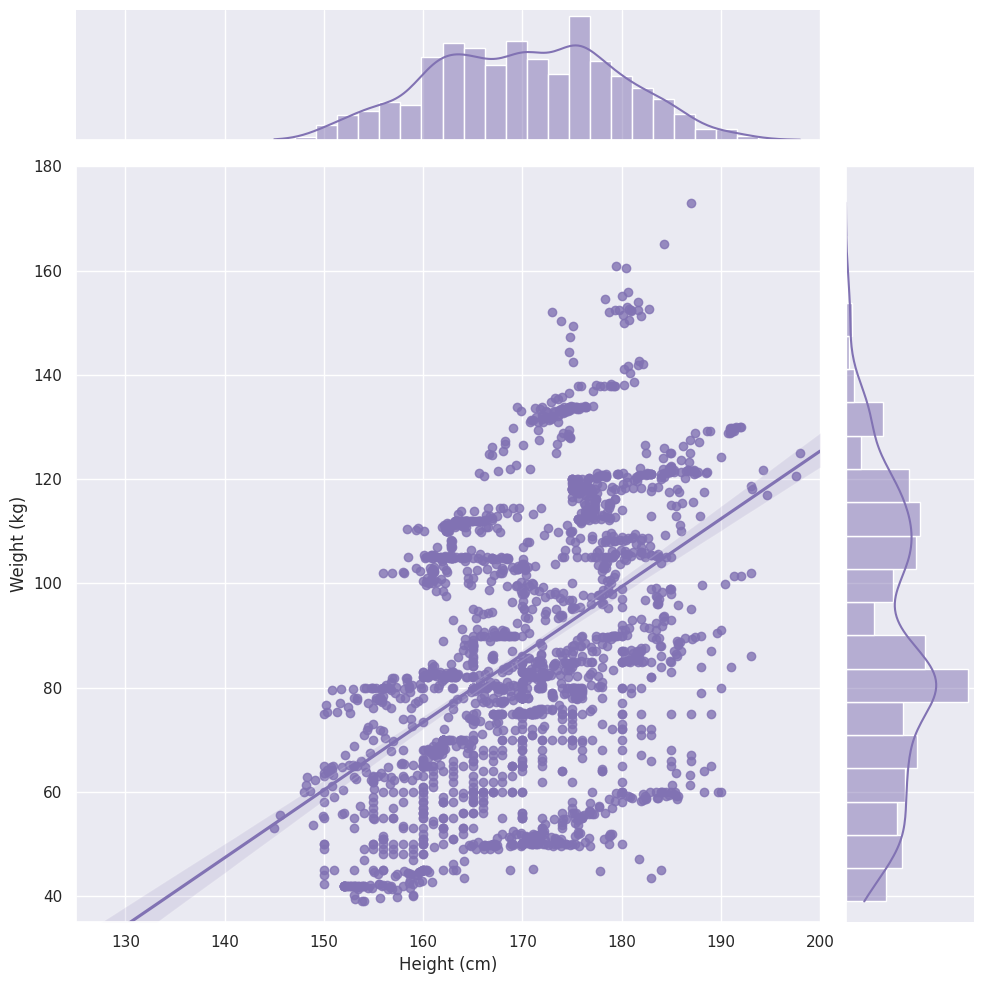

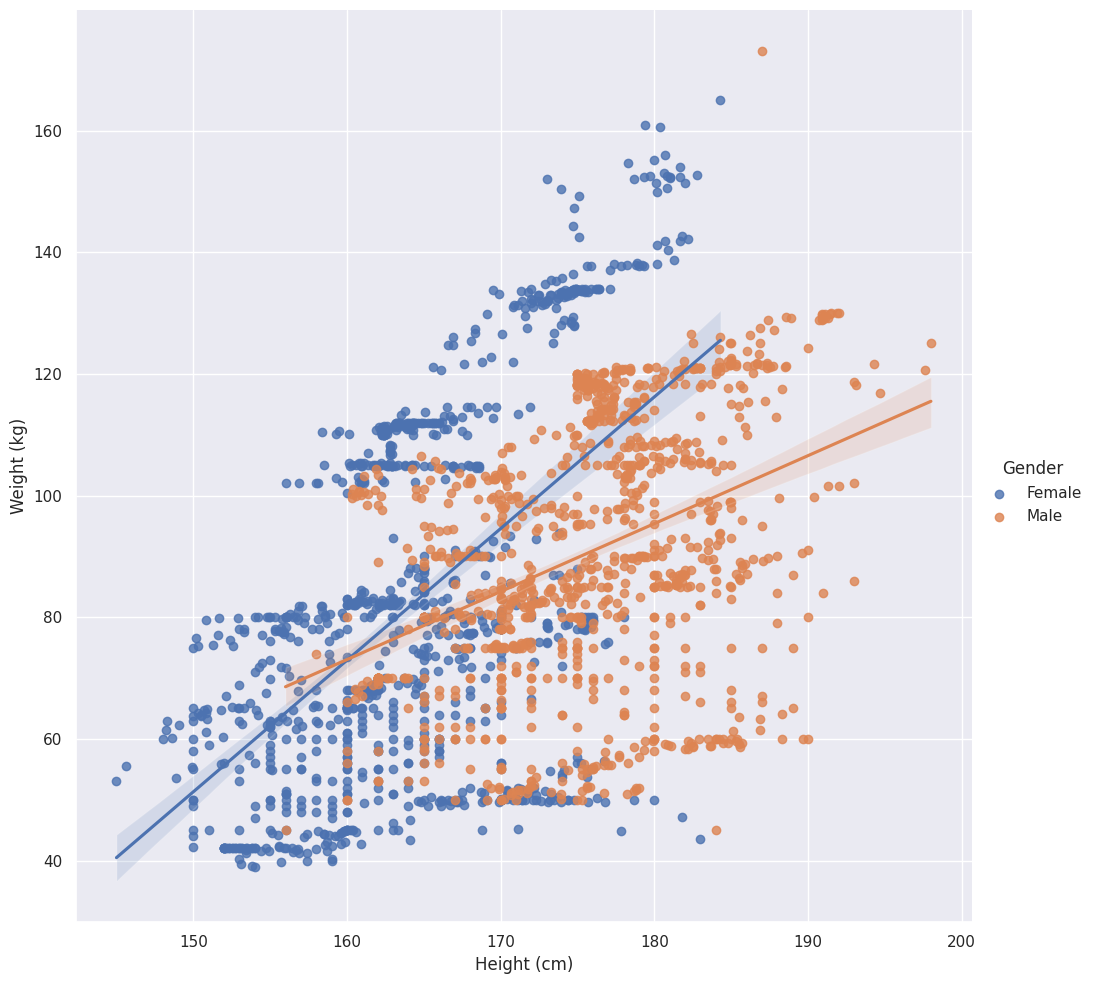

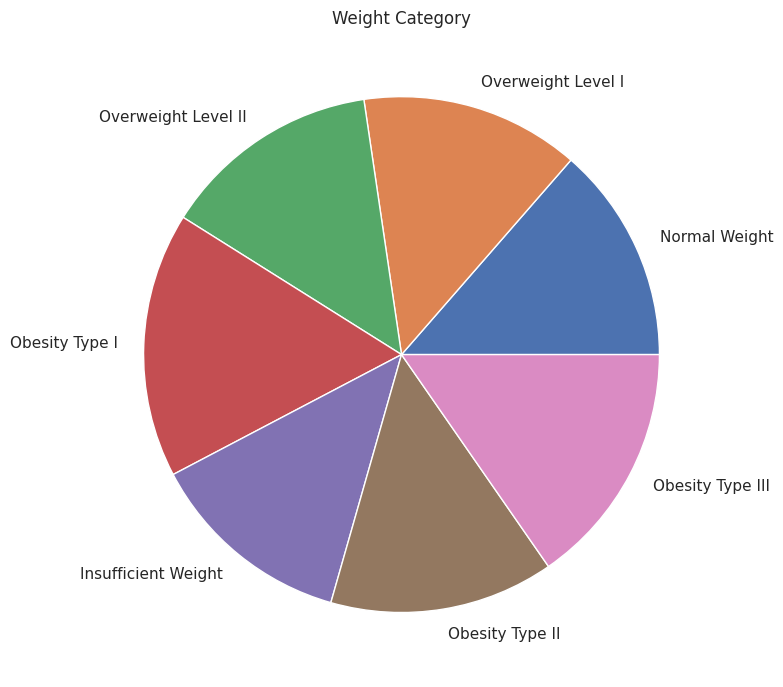

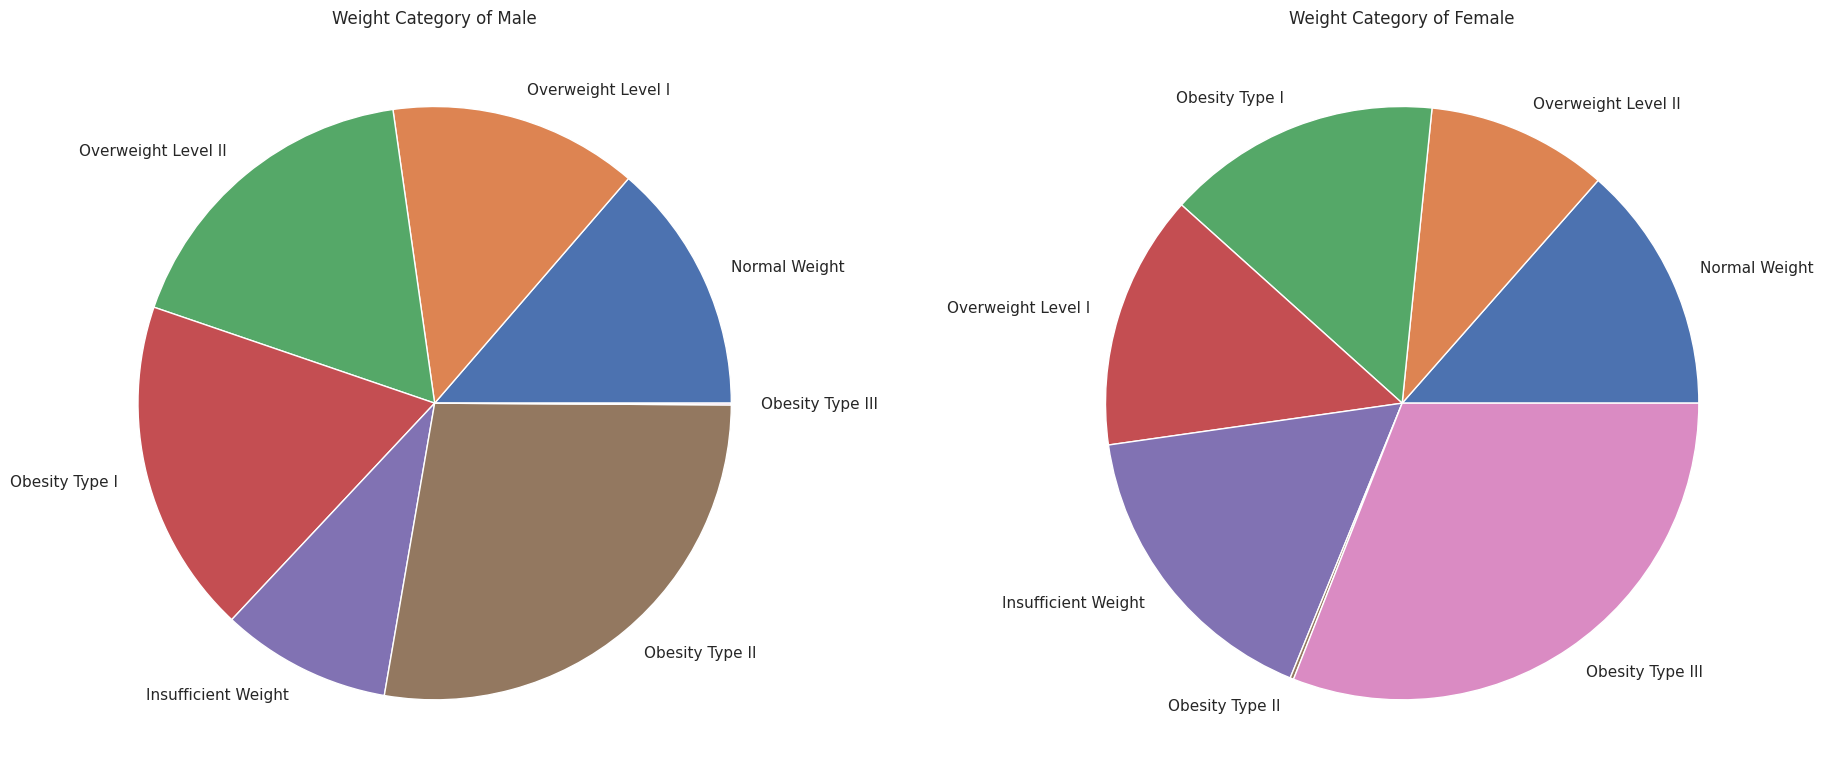

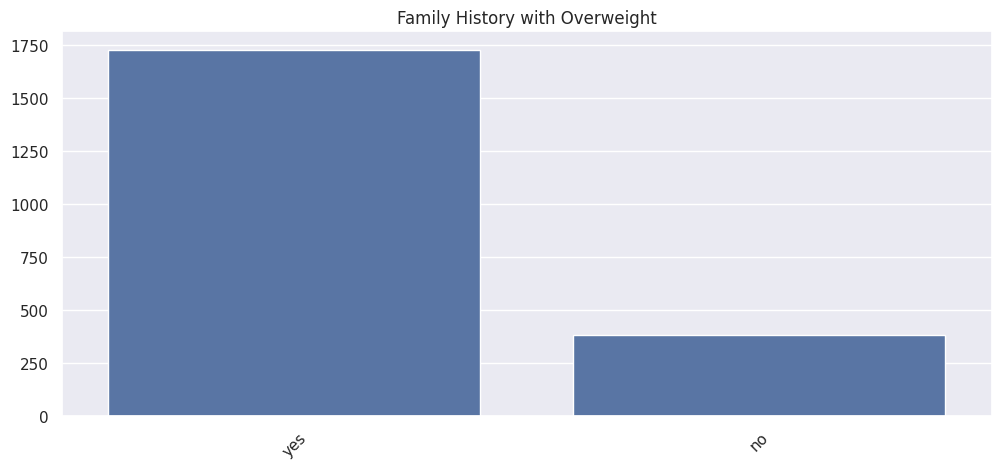

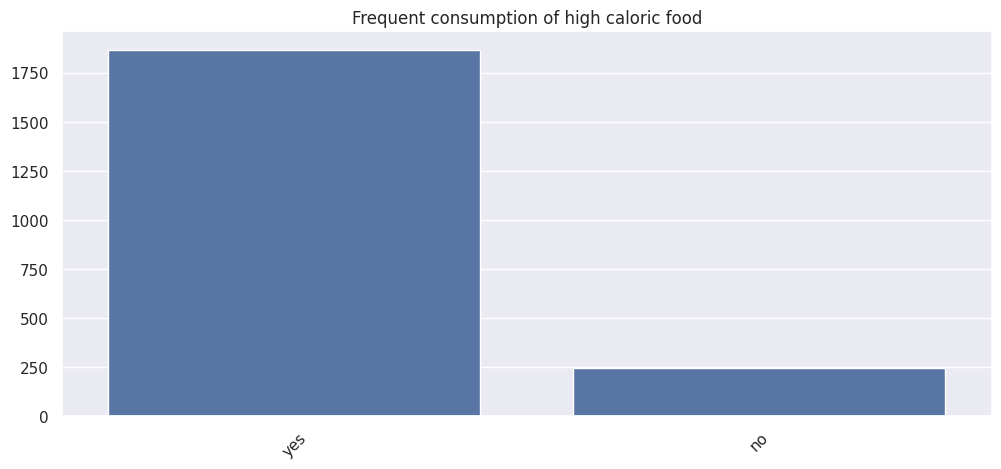

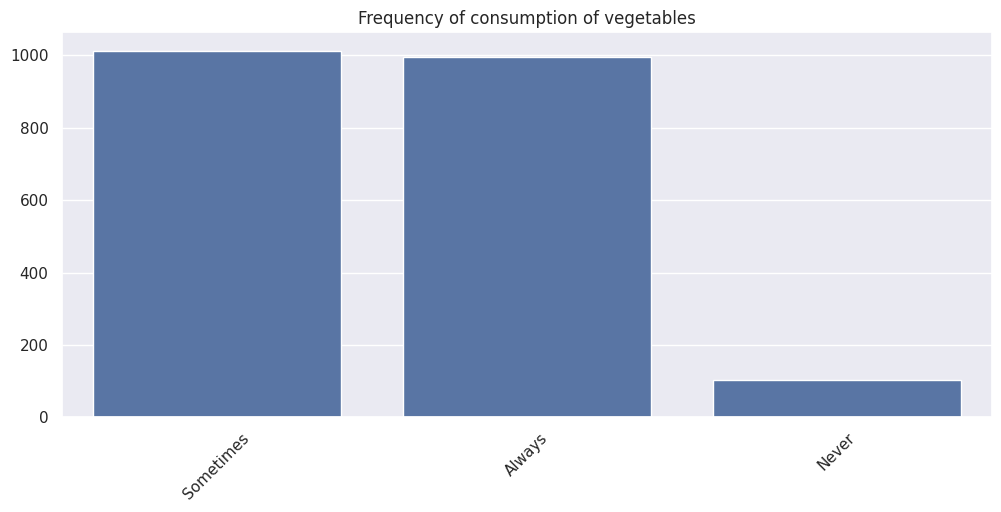

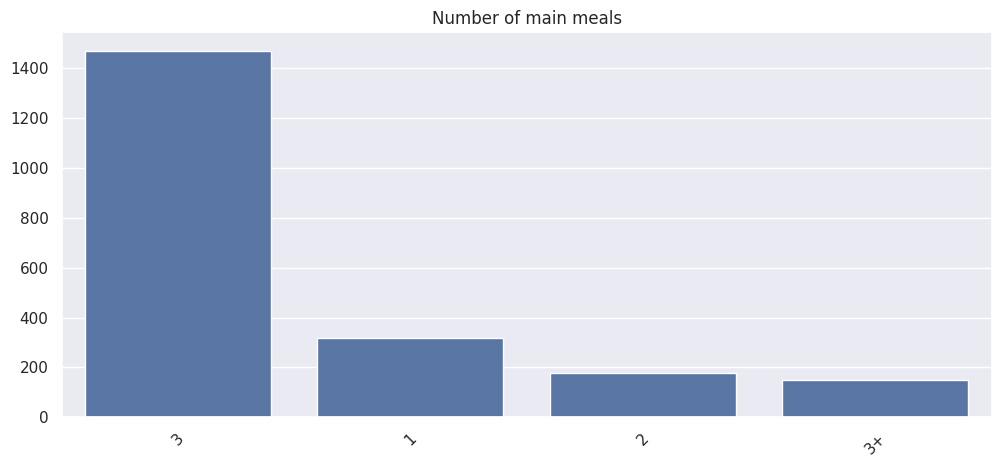

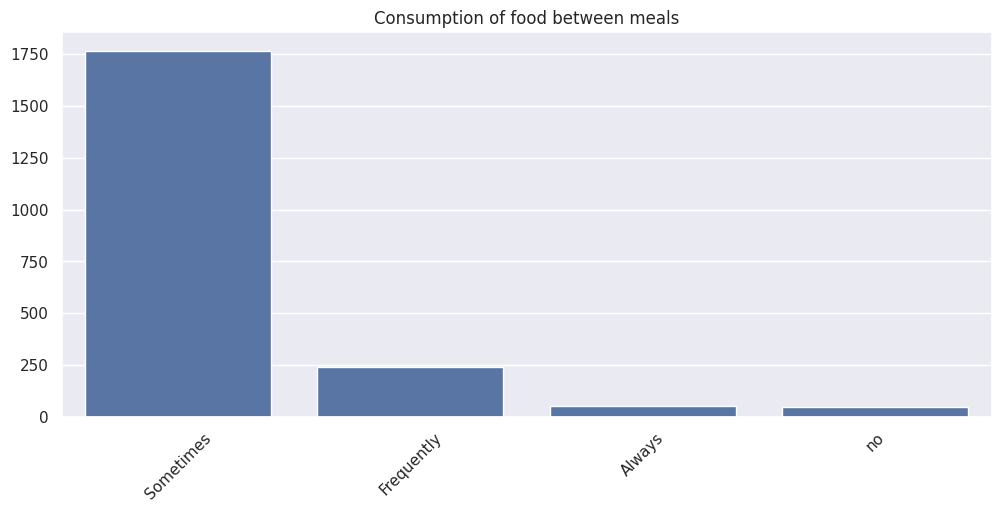

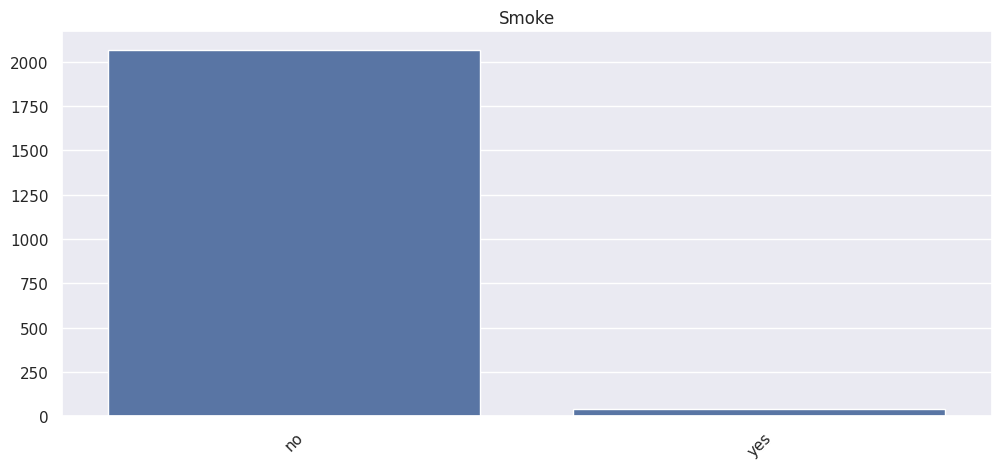

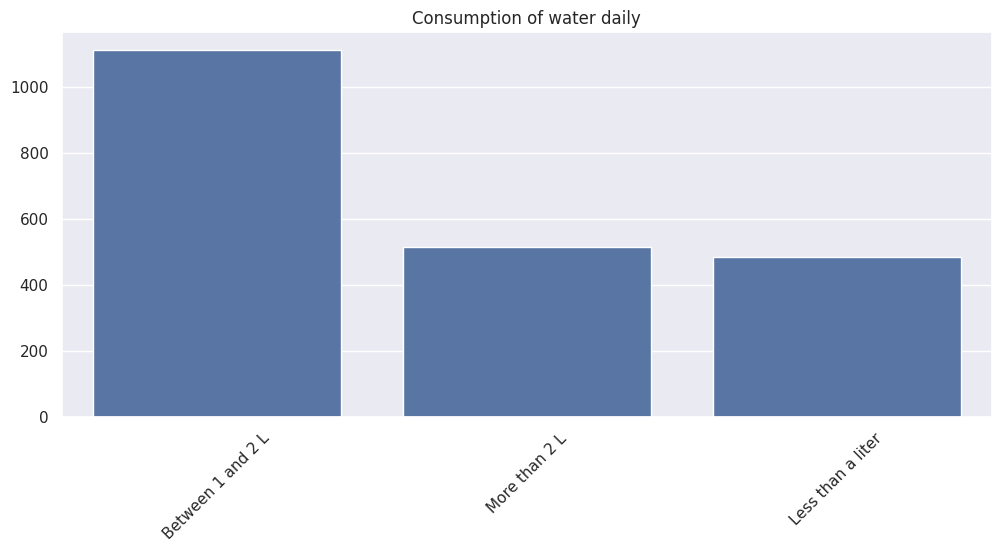

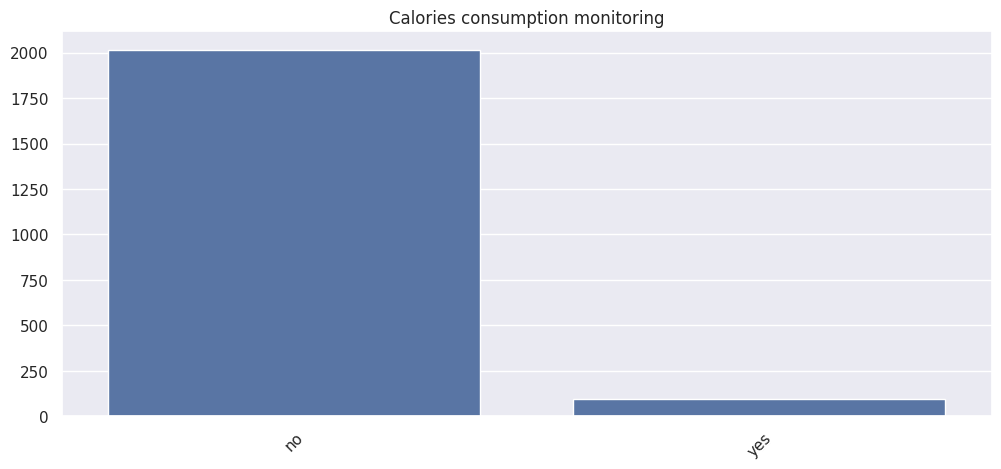

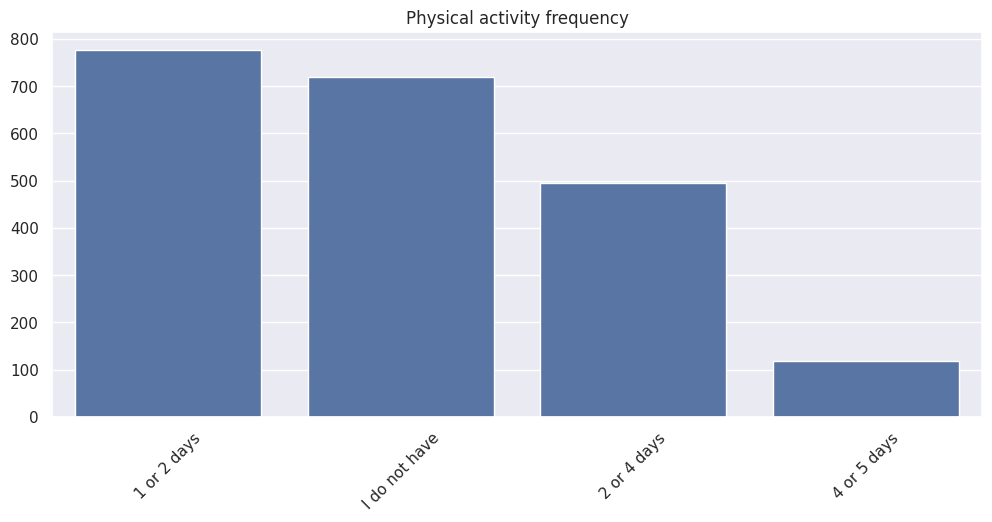

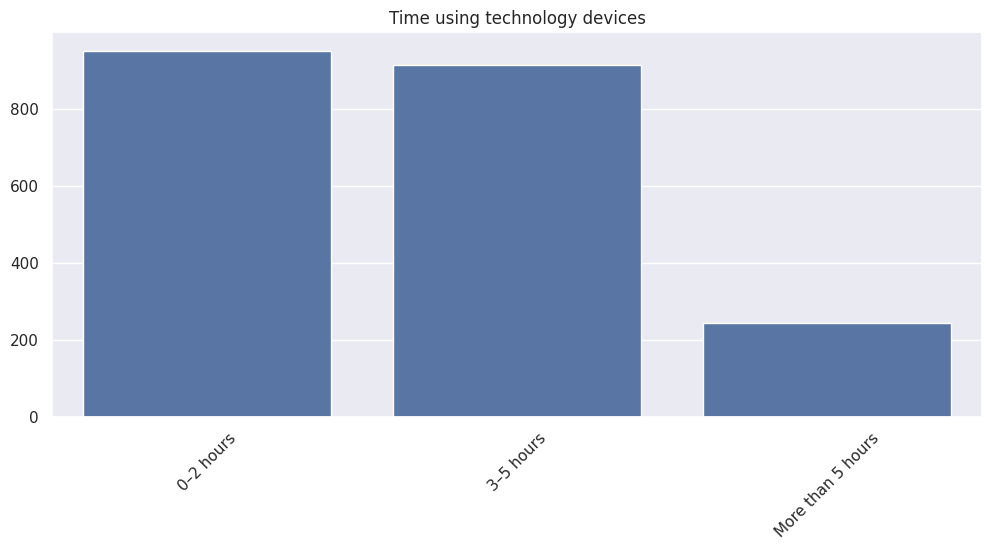

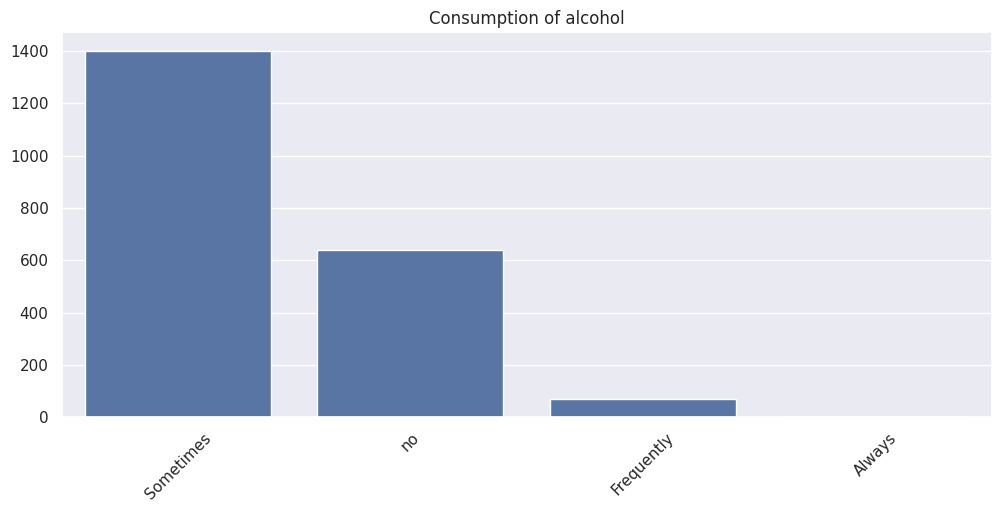

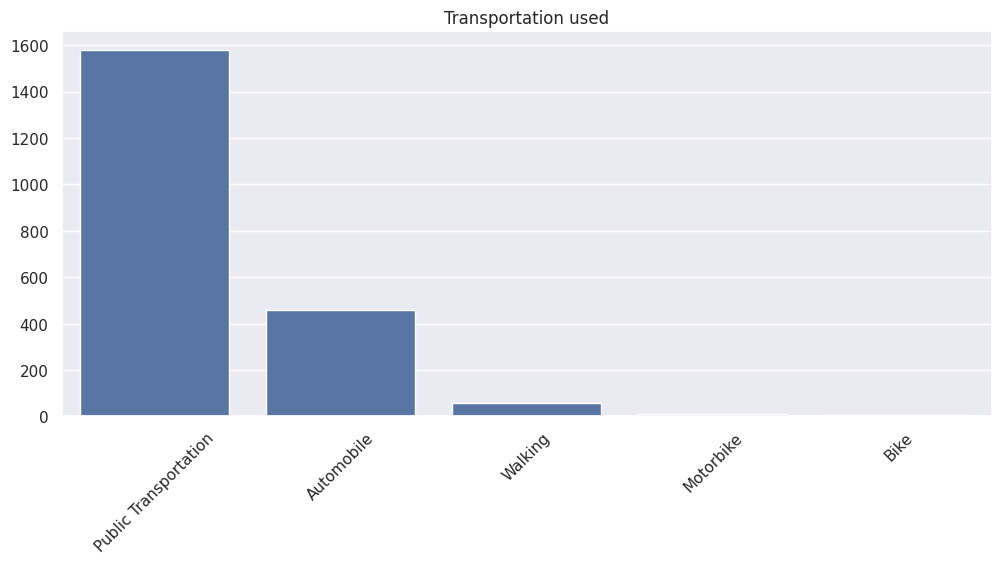


Class Distribution of 'Obesity':
 Obesity
Obesity Type I         351
Obesity Type III       324
Obesity Type II        297
Overweight Level I     290
Overweight Level II    290
Normal Weight          287
Insufficient Weight    272
Name: count, dtype: int64


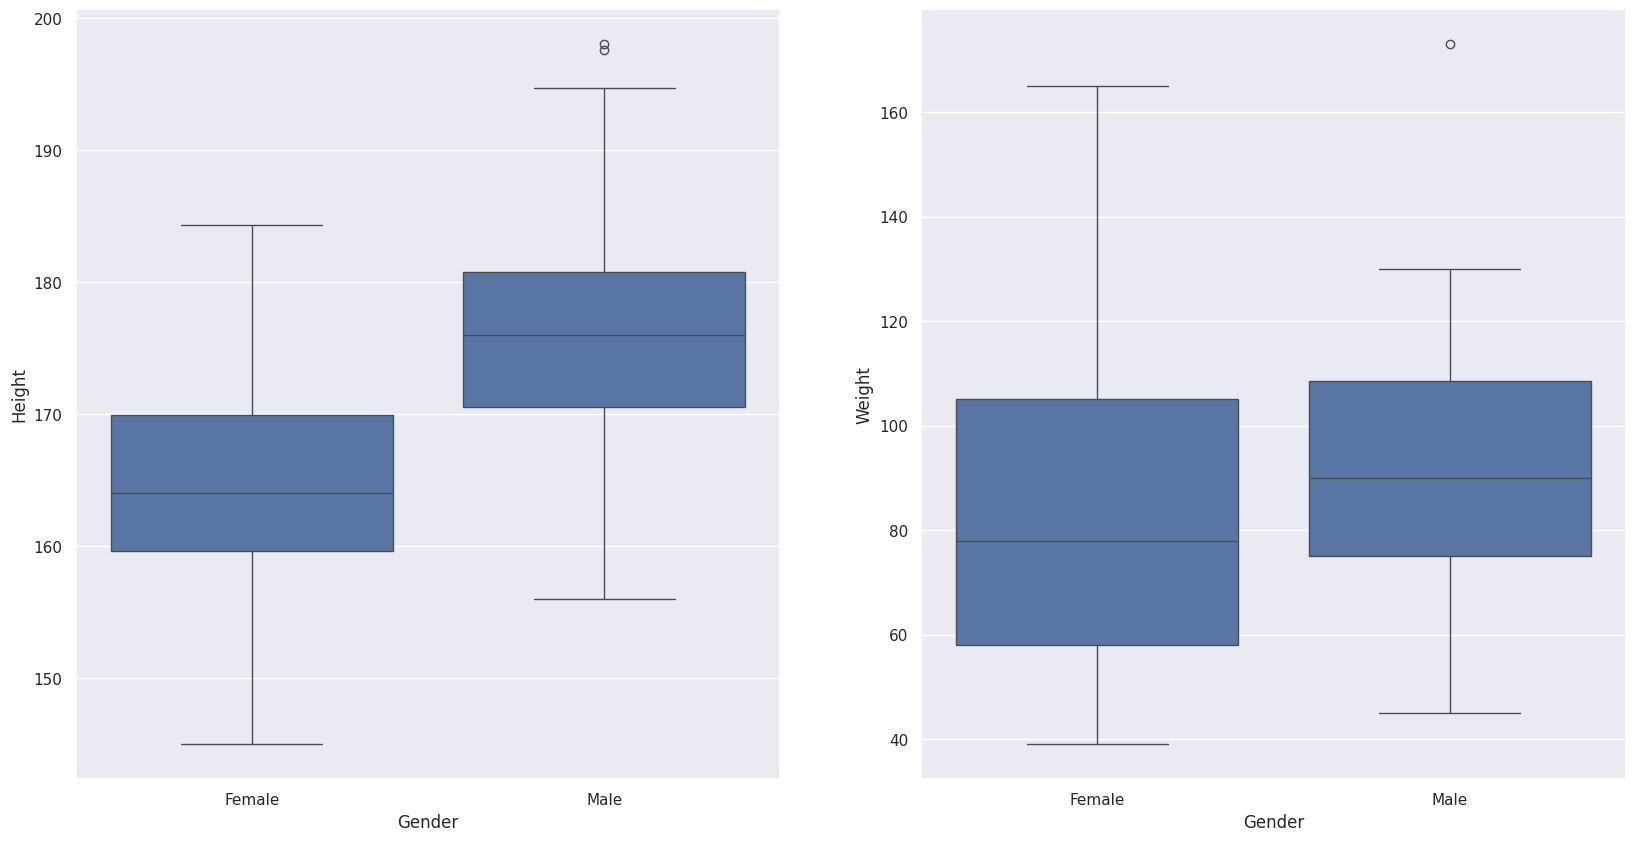

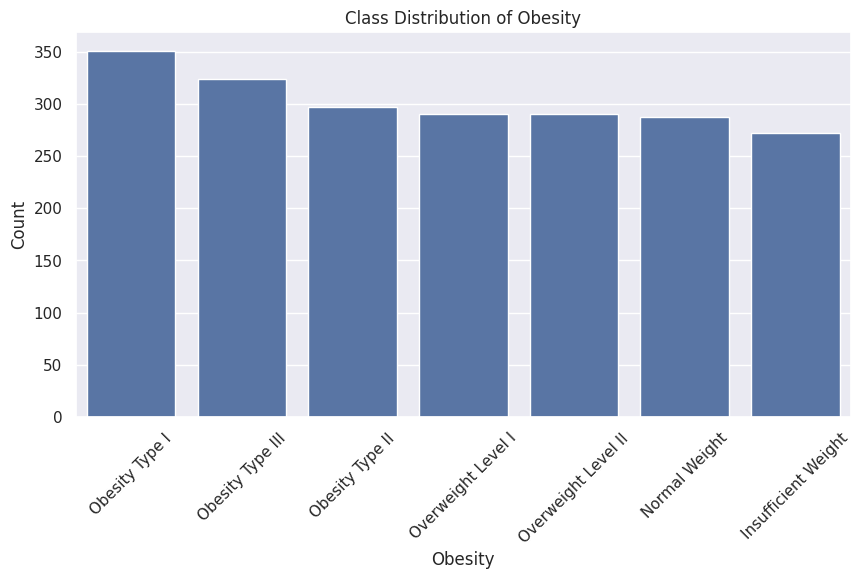


Random Forest Training Accuracy: 98.05%
Random Forest Testing Accuracy: 92.91%

Random Forest Classification Report:
                      precision    recall  f1-score   support

Insufficient Weight       0.95      0.98      0.96        56
      Normal Weight       0.86      0.79      0.82        62
     Obesity Type I       0.96      0.95      0.95        78
    Obesity Type II       0.97      0.97      0.97        58
   Obesity Type III       1.00      1.00      1.00        63
 Overweight Level I       0.83      0.88      0.85        56
Overweight Level II       0.92      0.94      0.93        50

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423


Logistic Regression Training Accuracy: 92.71%
Logistic Regression Testing Accuracy: 91.96%

Logistic Regression Classification Report:
                      precision    recall  f1-score   support

Insuffic

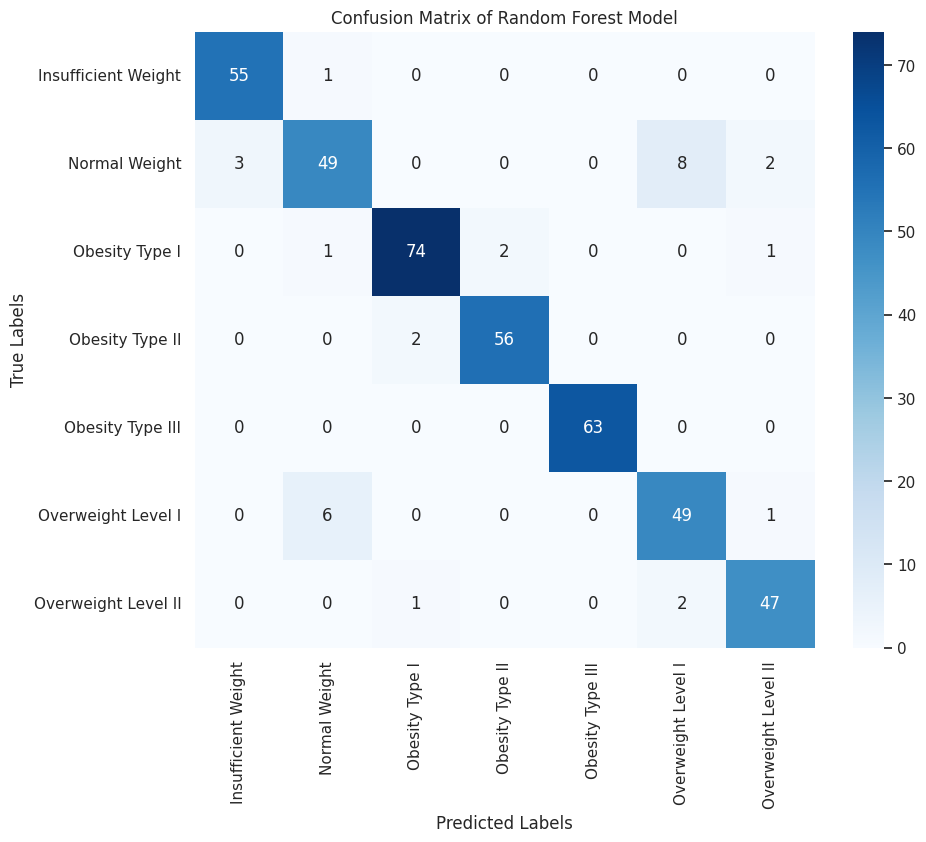

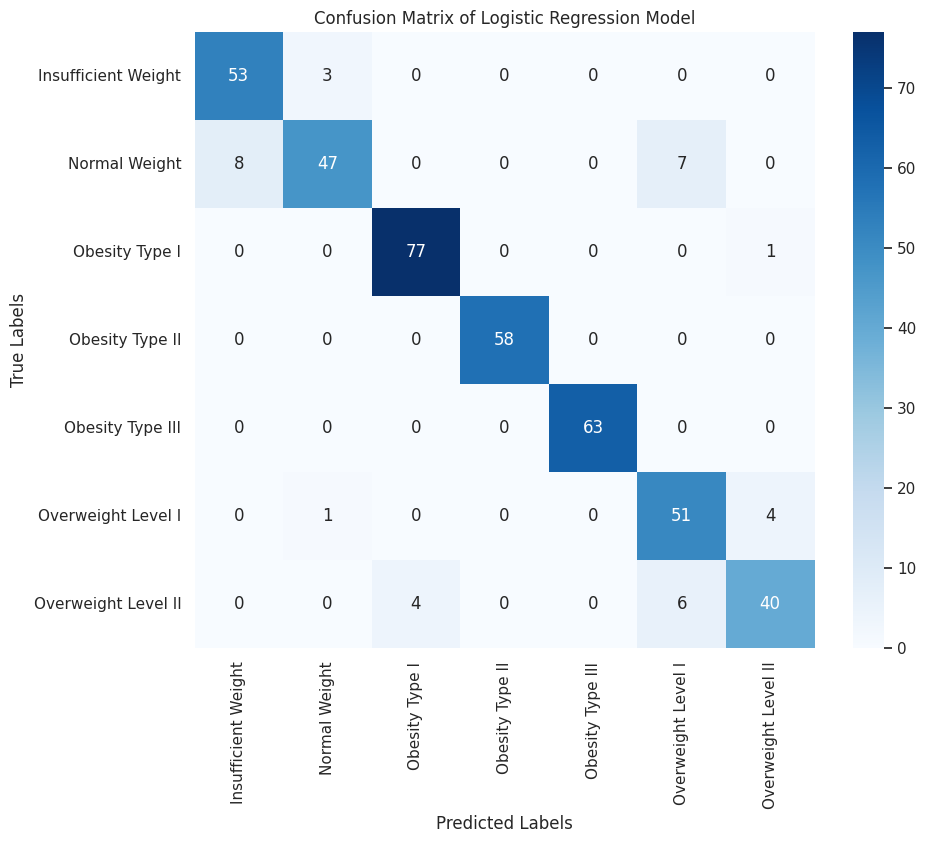

Predicted Obesity Category (Random Forest): Obesity Type I
Predicted Obesity Category (Logistic Regression): Obesity Type II


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib  # For saving the model
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')

# Renaming columns for readability
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
              'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables',
              'Number of main meals', 'Consumption of food between meals', 'Smoke',
              'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency',
              'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity']

# Replacing underscores with spaces in some columns
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))

# Converting Height to cm and rounding numerical values
df['Height'] = df['Height'] * 100
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(1)

# Checking for null values
print("Null values in the dataset:")
print(df.isnull().sum())

# Round relevant columns
for x in ['Frequency of consumption of vegetables', 'Number of main meals',
          'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    df[x] = df[x].apply(round)

# Replacing numerical values with categorical mappings
mapping0 = {1: 'Never', 2: 'Sometimes', 3: 'Always'}
mapping1 = {1: '1', 2: '2', 3: '3', 4: '3+'}
mapping2 = {1: 'Less than a liter', 2: 'Between 1 and 2 L', 3: 'More than 2 L'}
mapping3 = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
mapping4 = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}

df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(mapping0)
df['Number of main meals'] = df['Number of main meals'].replace(mapping1)
df['Consumption of water daily'] = df['Consumption of water daily'].replace(mapping2)
df['Physical activity frequency'] = df['Physical activity frequency'].replace(mapping3)
df['Time using technology devices'] = df['Time using technology devices'].replace(mapping4)

# Visualization: Height vs Weight
sns.set()
g = sns.jointplot(x="Height", y="Weight", data=df, kind="reg", truncate=False, xlim=(125, 200), ylim=(35, 180), color="m", height=10)
g.set_axis_labels("Height (cm)", "Weight (kg)")

# Visualization: Height vs Weight by Gender
g = sns.lmplot(x="Height", y="Weight", hue="Gender", height=10, data=df)
g.set_axis_labels("Height (cm)", "Weight (kg)")

# Pie Chart of Obesity
c = Counter(df['Obesity'])
fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct=None)
plt.title('Weight Category')
plt.tight_layout()

# Pie Charts by Gender
filt = df['Gender'] == 'Male'
c_m = Counter(df.loc[filt, 'Obesity'])
c_f = Counter(df.loc[~filt, 'Obesity'])

fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.pie([float(c_m[v]) for v in c_m], labels=[str(k) for k in c_m], autopct=None)
plt.title('Weight Category of Male')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.pie([float(c_f[v]) for v in c_f], labels=[str(k) for k in c_f], autopct=None)
plt.title('Weight Category of Female')
plt.tight_layout()

# Bar Plots for Eating and Exercise Habits
for a in df.columns[4:-1]:
    data = df[a].value_counts()
    values = df[a].value_counts().index.to_list()
    counts = df[a].value_counts().to_list()

    plt.figure(figsize=(12,5))
    ax = sns.barplot(x=values, y=counts)

    plt.title(a)
    plt.xticks(rotation=45)
    plt.show()

# Boxplots for Gender vs Height and Weight
sns.set()
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight', data=df)

# Checking class imbalance for 'Obesity'
obesity_counts = df['Obesity'].value_counts()
print("\nClass Distribution of 'Obesity':\n", obesity_counts)

# Plotting the class distribution for 'Obesity'
plt.figure(figsize=(10,5))
sns.barplot(x=obesity_counts.index, y=obesity_counts.values)
plt.title("Class Distribution of Obesity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Create a dictionary to store separate LabelEncoders for each categorical column
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # Store the encoder for each categorical column

# Split the data into features and target variable
X = df.drop('Obesity', axis=1)  # Features
y = df['Obesity']  # Target variable

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier model with reduced complexity
rf_classifier = RandomForestClassifier(
    n_estimators=50,                # Reduce the number of trees
    max_depth=10,                   # Limit the maximum depth of the trees
    max_features='sqrt',            # Limit the number of features used to split each node
    min_samples_split=4,            # Increase the minimum samples required to split a node
    min_samples_leaf=4,             # Increase the minimum samples required to be at a leaf node
    random_state=42
)
rf_classifier.fit(X_train, y_train)

# Logistic Regression Model
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)

# Make predictions on the training and test sets (Random Forest)
y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf = rf_classifier.predict(X_test)

# Make predictions on the training and test sets (Logistic Regression)
y_train_pred_lr = lr_classifier.predict(X_train)
y_test_pred_lr = lr_classifier.predict(X_test)

# Evaluate Random Forest Model
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
class_report_rf = classification_report(y_test, y_test_pred_rf, target_names=label_encoders['Obesity'].classes_)
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

# Evaluate Logistic Regression Model
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
class_report_lr = classification_report(y_test, y_test_pred_lr, target_names=label_encoders['Obesity'].classes_)
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)

# Print accuracy of both models
print(f"\nRandom Forest Training Accuracy: {train_accuracy_rf*100:.2f}%")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf*100:.2f}%")
print("\nRandom Forest Classification Report:\n", class_report_rf)

print(f"\nLogistic Regression Training Accuracy: {train_accuracy_lr*100:.2f}%")
print(f"Logistic Regression Testing Accuracy: {test_accuracy_lr*100:.2f}%")
print("\nLogistic Regression Classification Report:\n", class_report_lr)

# Confusion Matrix Heatmap for Random Forest
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Obesity'].classes_, yticklabels=label_encoders['Obesity'].classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Random Forest Model")
plt.show()

# Confusion Matrix Heatmap for Logistic Regression
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Obesity'].classes_, yticklabels=label_encoders['Obesity'].classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Logistic Regression Model")
plt.show()

# Save the models and label encoders for future use
joblib.dump(rf_classifier, 'random_forest_obesity_model.pkl')  # Save the Random Forest model
joblib.dump(lr_classifier, 'logistic_regression_obesity_model.pkl')  # Save the Logistic Regression model
joblib.dump(label_encoders, 'label_encoders.pkl')  # Save the label encoders

# Function to make predictions for new input data
def predict_obesity(input_data, model):
    """
    Predicts the Obesity category for the given input data using the specified model.

    Parameters:
    input_data (list): A list of feature values in the same order as the dataset.
    model: Trained model (Random Forest or Logistic Regression).

    Returns:
    str: Predicted Obesity category.
    """
    # Convert the input data into a DataFrame
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Encode categorical variables in the input data using saved encoders
    for column in input_df.columns:
        if column in label_encoders:
            try:
                # Transform the input data using the corresponding label encoder
                input_df[column] = label_encoders[column].transform([input_df[column][0]])
            except ValueError as e:
                print(f"Error: {e}")
                print(f"'{input_df[column][0]}' is not a recognized category for column '{column}'.")

    # Make the prediction
    prediction = model.predict(input_df)

    # Return the decoded prediction
    return label_encoders['Obesity'].inverse_transform(prediction)[0]

# Example new input for prediction
new_input = ['Male', 21.6, 177.4, 116.2, 'yes', 'yes', 'Sometimes', '3', 'Sometimes', 'no', 'Between 1 and 2 L',
             'no', '1 or 2 days', '3–5 hours', 'Sometimes', 'Public Transportation']


# Make the prediction using Random Forest
predicted_obesity_rf = predict_obesity(new_input, rf_classifier)
print(f"Predicted Obesity Category (Random Forest): {predicted_obesity_rf}")

# Make the prediction using Logistic Regression
predicted_obesity_lr = predict_obesity(new_input, lr_classifier)
print(f"Predicted Obesity Category (Logistic Regression): {predicted_obesity_lr}")


# Generating Dataset Using Smote

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Transformed_ObesityDataSet.csv')

# Separate features and target
X = df.drop(columns=['Obesity'])  # Remove the target or identifier
y = df['Obesity']  # Target variable

# Check the original class distribution
print("Original Class Distribution:")
print(y.value_counts())

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Encode categorical columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    X[col] = label_encoders[col].fit_transform(X[col])

# Apply SMOTE to generate synthetic data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back categorical columns to original form
for col in categorical_cols:
    X_resampled[col] = label_encoders[col].inverse_transform(X_resampled[col])

# Create a DataFrame with resampled data
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Obesity'] = y_resampled

# Check if all 7 classes are represented in the synthetic data
print("Synthetic Class Distribution after SMOTE:")
print(resampled_df['Obesity'].value_counts())

# Manually handle any missing classes
# If "Obesity Type I" or any other class is missing, we generate data manually from the original dataset
missing_classes = set(df['Obesity'].unique()) - set(resampled_df['Obesity'].unique())
for missing_class in missing_classes:
    print(f"Manually handling missing class: {missing_class}")
    class_samples = df[df['Obesity'] == missing_class].sample(n=20, random_state=42, replace=True)
    resampled_df = pd.concat([resampled_df, class_samples], ignore_index=True)

# Group by Obesity and sample 20 instances per class
new_dataset = resampled_df.groupby('Obesity').apply(lambda x: x.sample(n=20, random_state=42)).reset_index(drop=True)

# Shuffle the dataset to mix the classes
new_dataset = shuffle(new_dataset, random_state=42)

# Save or return the new dataset
new_dataset.to_csv('/content/drive/MyDrive/sy_obesity_dataset.csv', index=False)

# Display the new dataset shape and class distribution
print("New Synthetic Dataset Shape and Class Distribution:")
print(new_dataset.shape)
print(new_dataset['Obesity'].value_counts())


Original Class Distribution:
Obesity
Obesity Type I         351
Obesity Type III       324
Obesity Type II        297
Overweight Level I     290
Overweight Level II    290
Normal Weight          287
Insufficient Weight    272
Name: count, dtype: int64
Synthetic Class Distribution after SMOTE:
Obesity
Normal Weight          351
Overweight Level I     351
Overweight Level II    351
Obesity Type I         351
Insufficient Weight    351
Obesity Type II        351
Obesity Type III       351
Name: count, dtype: int64
New Synthetic Dataset Shape and Class Distribution:
(140, 17)
Obesity
Overweight Level I     20
Obesity Type II        20
Normal Weight          20
Obesity Type I         20
Insufficient Weight    20
Obesity Type III       20
Overweight Level II    20
Name: count, dtype: int64


Predicting the Data from the Unseen Dataset

Comparison of Actual and Predicted Obesity Categories for all data:
          Actual Obesity Predicted Obesity (Random Forest)  \
0     Overweight Level I                Overweight Level I   
1        Obesity Type II                   Obesity Type II   
2          Normal Weight                     Normal Weight   
3     Overweight Level I                Overweight Level I   
4         Obesity Type I                    Obesity Type I   
..                   ...                               ...   
135      Obesity Type II                   Obesity Type II   
136   Overweight Level I                Overweight Level I   
137  Insufficient Weight               Insufficient Weight   
138     Obesity Type III                  Obesity Type III   
139   Overweight Level I                Overweight Level I   

    Predicted Obesity (Logistic Regression)  
0                        Overweight Level I  
1                           Obesity Type II  
2                             Normal Weight  
3  

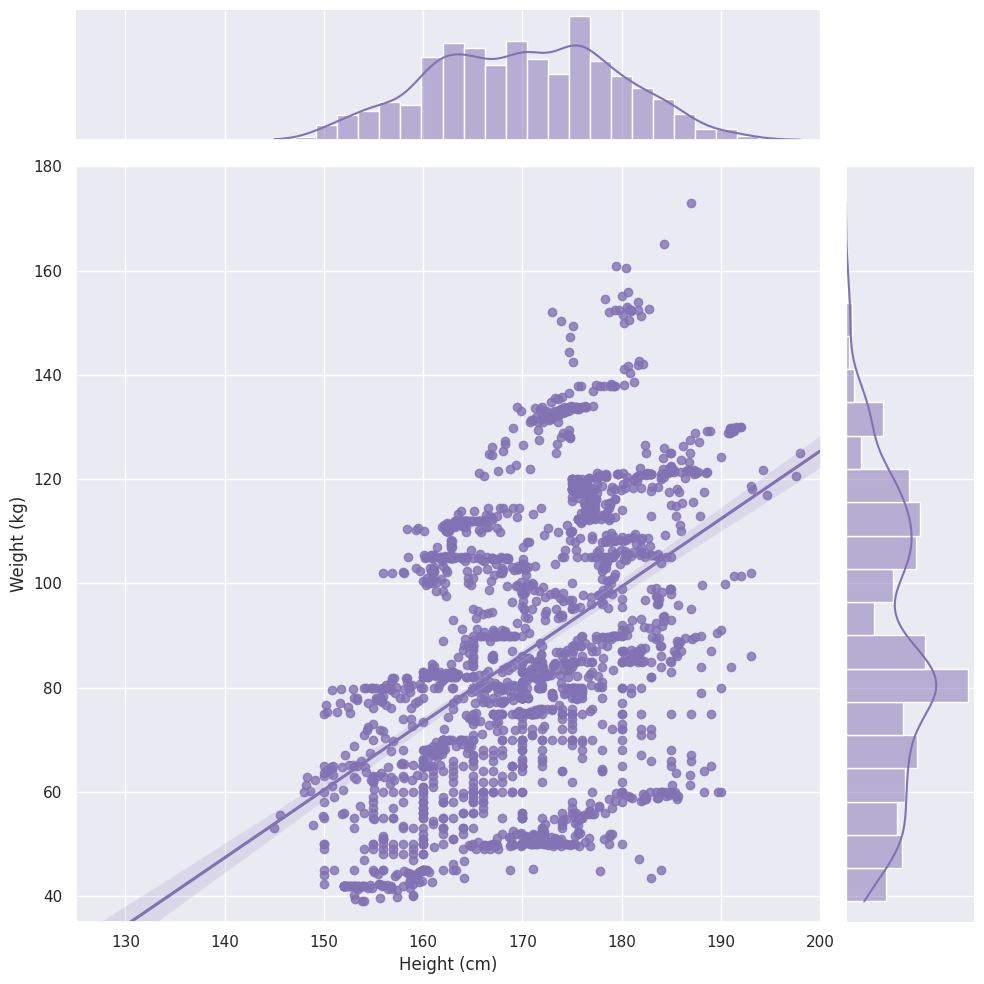

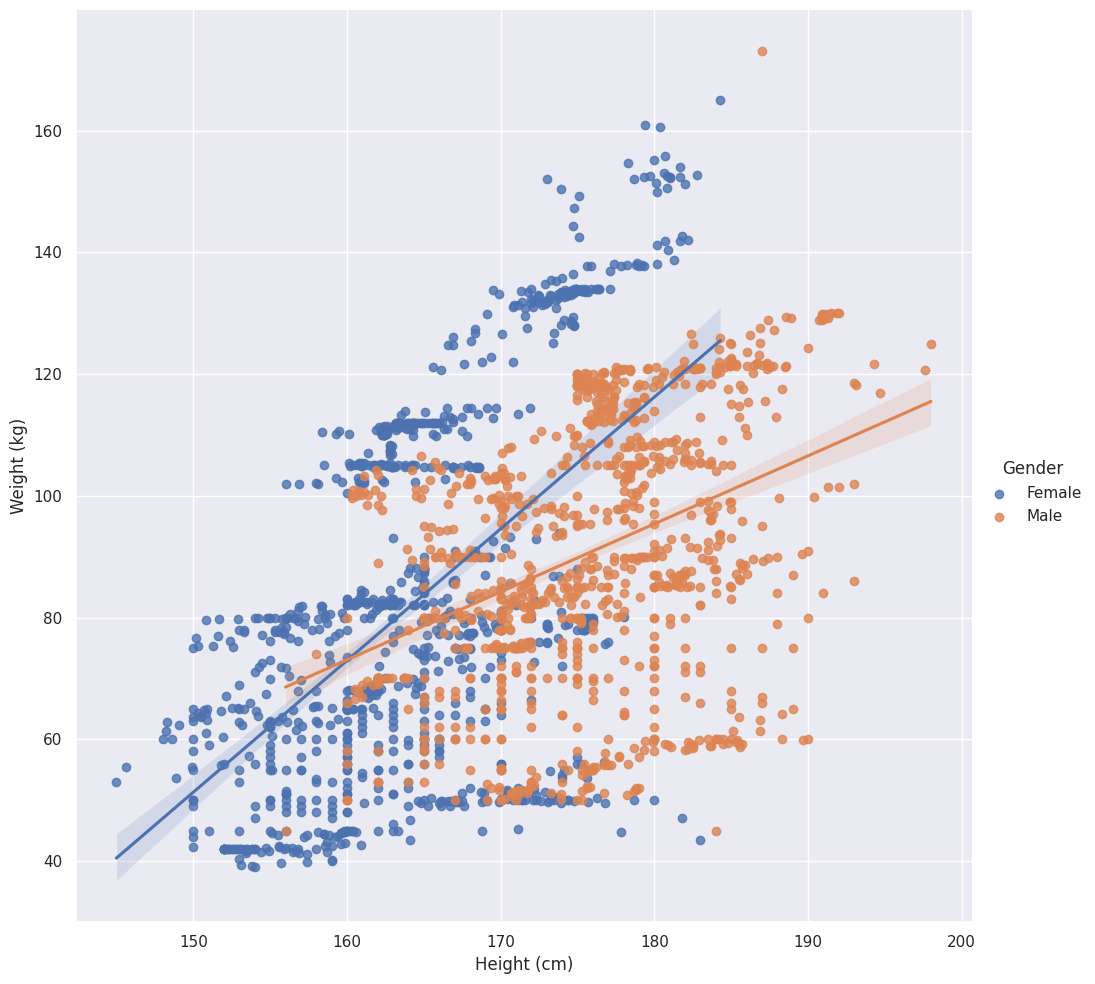

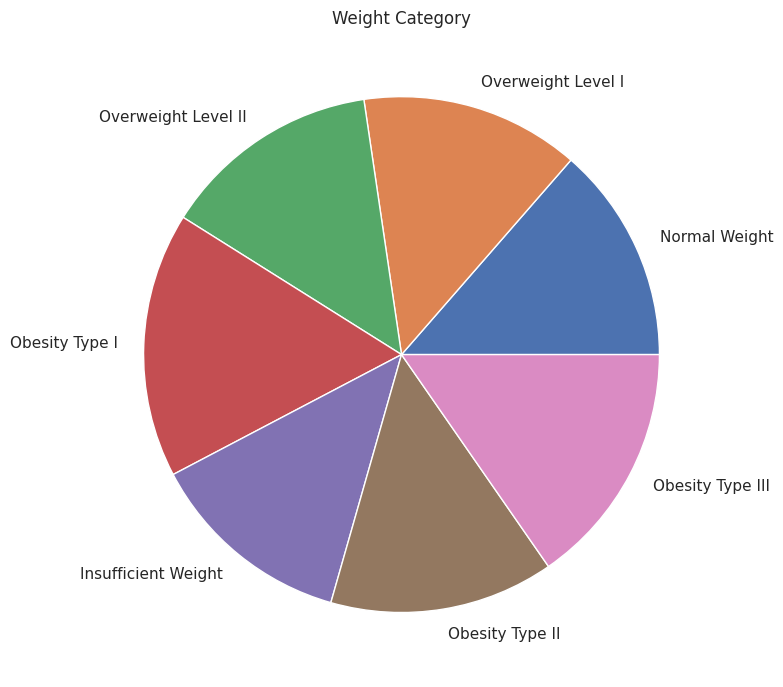

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# **STEP 1: Load both datasets**
# Load the dataset for visualization
df_visual = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')  # Use appropriate path for the visualization dataset

# Load the dataset for prediction/modeling
df_model = pd.read_csv('/content/drive/MyDrive/sy_obesity_dataset.csv')  # Use appropriate path for the modeling dataset


### **STEP 2: Preprocess Visualization Dataset (df_visual)** ###
df_visual.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
                     'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables',
                     'Number of main meals', 'Consumption of food between meals', 'Smoke',
                     'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency',
                     'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity']

# Replacing underscores with spaces in some columns
df_visual['Obesity'] = df_visual['Obesity'].apply(lambda x: x.replace('_', ' '))
df_visual['Transportation used'] = df_visual['Transportation used'].apply(lambda x: x.replace('_', ' '))

# Convert Height to cm and round numerical values
df_visual['Height'] = df_visual['Height'] * 100
df_visual['Height'] = df_visual['Height'].round(1)
df_visual['Weight'] = df_visual['Weight'].round(1)
df_visual['Age'] = df_visual['Age'].round(1)

# Visualization: Height vs Weight
sns.set()
g = sns.jointplot(x="Height", y="Weight", data=df_visual, kind="reg", truncate=False, xlim=(125, 200), ylim=(35, 180), color="m", height=10)
g.set_axis_labels("Height (cm)", "Weight (kg)")

# Visualization: Height vs Weight by Gender
g = sns.lmplot(x="Height", y="Weight", hue="Gender", height=10, data=df_visual)
g.set_axis_labels("Height (cm)", "Weight (kg)")

# Pie Chart of Obesity
c = Counter(df_visual['Obesity'])
fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct=None)
plt.title('Weight Category')
plt.tight_layout()

# Continue other visualizations...
# ...

### **STEP 3: Preprocess Prediction/Model Dataset (df_model)** ###
df_model.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
                    'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables',
                    'Number of main meals', 'Consumption of food between meals', 'Smoke',
                    'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency',
                    'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity']

# Similar preprocessing for the modeling dataset
df_model['Obesity'] = df_model['Obesity'].apply(lambda x: x.replace('_', ' '))
df_model['Transportation used'] = df_model['Transportation used'].apply(lambda x: x.replace('_', ' '))

# Convert Height to cm and round numerical values
df_model['Height'] = df_model['Height'] * 100
df_model['Height'] = df_model['Height'].round(1)
df_model['Weight'] = df_model['Weight'].round(1)
df_model['Age'] = df_model['Age'].round(1)

# Encoding and preprocessing for modeling
label_encoders = {}
for column in df_model.columns:
    if df_model[column].dtype == 'object':
        le = LabelEncoder()
        df_model[column] = le.fit_transform(df_model[column])
        label_encoders[column] = le

# Split the data into features and target variable
X = df_model.drop('Obesity', axis=1)  # Features
y = df_model['Obesity']  # Target variable

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=4,
    min_samples_leaf=4,
    random_state=42
)
rf_classifier.fit(X_train, y_train)

# Logistic Regression Model
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)

# Make predictions for all data in the dataset
rf_predictions = rf_classifier.predict(X)
lr_predictions = lr_classifier.predict(X)

# Decode the predicted labels using the label encoders
actual_obesity = label_encoders['Obesity'].inverse_transform(y)
predicted_obesity_rf = label_encoders['Obesity'].inverse_transform(rf_predictions)
predicted_obesity_lr = label_encoders['Obesity'].inverse_transform(lr_predictions)

# Create a DataFrame to show actual and predicted obesity categories for both models
results_df = pd.DataFrame({
    'Actual Obesity': actual_obesity,
    'Predicted Obesity (Random Forest)': predicted_obesity_rf,
    'Predicted Obesity (Logistic Regression)': predicted_obesity_lr
})

# Display the dataset comparison
print("Comparison of Actual and Predicted Obesity Categories for all data:")
print(results_df)

# Save the results to a CSV file (optional)
# results_df.to_csv('/path/to/save/results.csv', index=False)

# Print final accuracy results for both models
print(f"\nRandom Forest Testing Accuracy: {accuracy_score(y_test, rf_classifier.predict(X_test)) * 100:.2f}%")
print(f"Logistic Regression Testing Accuracy: {accuracy_score(y_test, lr_classifier.predict(X_test)) * 100:.2f}%")


Actual Vs Predicted O

In [ ]:
# Import necessary libraries
import pandas as pd
import joblib

# Load the saved models, label encoders, and dataset
rf_classifier = joblib.load('random_forest_obesity_model.pkl')
lr_classifier = joblib.load('logistic_regression_obesity_model.pkl')
label_encoders = joblib.load('label_encoders.pkl')
df = pd.read_csv('/content/drive/MyDrive/sy_obesity_dataset.csv')

# Prepare the dataset
# Renaming columns for readability
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
              'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables',
              'Number of main meals', 'Consumption of food between meals', 'Smoke',
              'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency',
              'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity']

# Encode the features
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Split the data into features and target variable
X = df.drop('Obesity', axis=1)  # Features
y = df['Obesity']  # Target variable

# Decode the actual labels from encoded values using the saved label encoders
actual_obesity = label_encoders['Obesity'].inverse_transform(y)

# Predict using the Random Forest model
predicted_obesity_rf = rf_classifier.predict(X)  # Predictions using the Random Forest model
predicted_obesity_rf = label_encoders['Obesity'].inverse_transform(predicted_obesity_rf)  # Decode predicted labels

# Predict using the Logistic Regression model
predicted_obesity_lr = lr_classifier.predict(X)  # Predictions using the Logistic Regression model
predicted_obesity_lr = label_encoders['Obesity'].inverse_transform(predicted_obesity_lr)  # Decode predicted labels

# Display the dataset comparison in the desired format
print("Comparison of Actual and Predicted Obesity Categories for all data:\n")

for i in range(len(X)):
    print(f"Instance {i + 1}")
    print(f"Actual Output: {actual_obesity[i]}")
    print(f"Predicted Output for Random Forest: {predicted_obesity_rf[i]}")
    print(f"Predicted Output for Logistic Regression: {predicted_obesity_lr[i]}")
    print()  # Blank line for better readability


Comparison of Actual and Predicted Obesity Categories for all data:

Instance 1
Actual Output: Overweight Level I
Predicted Output for Random Forest: Overweight Level I
Predicted Output for Logistic Regression: Overweight Level I

Instance 2
Actual Output: Obesity Type II
Predicted Output for Random Forest: Obesity Type II
Predicted Output for Logistic Regression: Obesity Type II

Instance 3
Actual Output: Normal Weight
Predicted Output for Random Forest: Normal Weight
Predicted Output for Logistic Regression: Normal Weight

Instance 4
Actual Output: Overweight Level I
Predicted Output for Random Forest: Overweight Level I
Predicted Output for Logistic Regression: Overweight Level I

Instance 5
Actual Output: Obesity Type I
Predicted Output for Random Forest: Obesity Type I
Predicted Output for Logistic Regression: Obesity Type I

Instance 6
Actual Output: Insufficient Weight
Predicted Output for Random Forest: Insufficient Weight
Predicted Output for Logistic Regression: Insufficient 

# Import necessary libraries
import pandas as pd
import joblib

# Load the saved models and label encoders
rf_classifier = joblib.load('random_forest_obesity_model.pkl')
lr_classifier = joblib.load('logistic_regression_obesity_model.pkl')
label_encoders = joblib.load('label_encoders.pkl')

# Load the uploaded dataset
df = pd.read_csv('/content/drive/MyDrive/sy_obesity_dataset.csv')

# Renaming columns for readability
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
              'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables',
              'Number of main meals', 'Consumption of food between meals', 'Smoke',
              'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency',
              'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity']

# Encode the features using saved label encoders
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoders[column].transform(df[column])

# Split the data into features and target variable
X = df.drop('Obesity', axis=1)  # Features
y = df['Obesity']  # Target variable

# Decode the actual labels from encoded values using the saved label encoders
actual_obesity = label_encoders['Obesity'].inverse_transform(y)

# Predict using the Random Forest model
predicted_obesity_rf = rf_classifier.predict(X)
predicted_obesity_rf = label_encoders['Obesity'].inverse_transform(predicted_obesity_rf)

# Predict using the Logistic Regression model
predicted_obesity_lr = lr_classifier.predict(X)
predicted_obesity_lr = label_encoders['Obesity'].inverse_transform(predicted_obesity_lr)

# Create a DataFrame to compare the actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Output': actual_obesity,
    'Predicted RF Output': predicted_obesity_rf,
    'Predicted LR Output': predicted_obesity_lr
})

'''# Save the comparison DataFrame to a CSV file to inspect the entire dataset
comparison_df.to_csv('/mnt/data/obesity_prediction_comparison.csv', index=False)

# Output message
print("The comparison of actual and predicted outputs for the entire dataset has been saved as 'obesity_prediction_comparison.csv'.")'''


In [ ]:
# Import necessary libraries
import pandas as pd
import joblib

# Load the saved models and label encoders
rf_classifier = joblib.load('random_forest_obesity_model.pkl')
lr_classifier = joblib.load('logistic_regression_obesity_model.pkl')
label_encoders = joblib.load('label_encoders.pkl')

# Load the uploaded dataset
df = pd.read_csv('/content/drive/MyDrive/sy_obesity_dataset.csv')

# Renaming columns for readability
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
              'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables',
              'Number of main meals', 'Consumption of food between meals', 'Smoke',
              'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency',
              'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity']

# Encode the features using saved label encoders
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoders[column].transform(df[column])

# Split the data into features and target variable
X = df.drop('Obesity', axis=1)  # Features
y = df['Obesity']  # Target variable

# Decode the actual labels from encoded values using the saved label encoders
actual_obesity = label_encoders['Obesity'].inverse_transform(y)

# Predict using the Random Forest model
predicted_obesity_rf = rf_classifier.predict(X)
predicted_obesity_rf = label_encoders['Obesity'].inverse_transform(predicted_obesity_rf)

# Predict using the Logistic Regression model
predicted_obesity_lr = lr_classifier.predict(X)
predicted_obesity_lr = label_encoders['Obesity'].inverse_transform(predicted_obesity_lr)

# Display the comparison of actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Output': actual_obesity,
    'Predicted RF Output': predicted_obesity_rf,
    'Predicted LR Output': predicted_obesity_lr
})

# Print the entire comparison DataFrame
print(comparison_df)

# Identify the indices of incorrect predictions for Random Forest
incorrect_rf_indices = comparison_df[comparison_df['Actual Output'] != comparison_df['Predicted RF Output']].index.tolist()

# Identify the indices of incorrect predictions for Logistic Regression
incorrect_lr_indices = comparison_df[comparison_df['Actual Output'] != comparison_df['Predicted LR Output']].index.tolist()

# Print the incorrect predictions
print("\n\nIncorrect Predictions for Random Forest:")
print(comparison_df.loc[incorrect_rf_indices])

print("\nIncorrect Predictions for Logistic Regression:")
print(comparison_df.loc[incorrect_lr_indices])

# Count the correct and incorrect predictions for Random Forest
correct_rf_count = (comparison_df['Actual Output'] == comparison_df['Predicted RF Output']).sum()
incorrect_rf_count = (comparison_df['Actual Output'] != comparison_df['Predicted RF Output']).sum()

# Count the correct and incorrect predictions for Logistic Regression
correct_lr_count = (comparison_df['Actual Output'] == comparison_df['Predicted LR Output']).sum()
incorrect_lr_count = (comparison_df['Actual Output'] != comparison_df['Predicted LR Output']).sum()

# Print the counts
print("\nCounts of Predictions:")
print(f"Random Forest - Correct: {correct_rf_count}, Incorrect: {incorrect_rf_count}")
print(f"Logistic Regression - Correct: {correct_lr_count}, Incorrect: {incorrect_lr_count}")



           Actual Output  Predicted RF Output  Predicted LR Output
0     Overweight Level I   Overweight Level I   Overweight Level I
1        Obesity Type II      Obesity Type II      Obesity Type II
2          Normal Weight        Normal Weight        Normal Weight
3     Overweight Level I   Overweight Level I   Overweight Level I
4         Obesity Type I       Obesity Type I       Obesity Type I
..                   ...                  ...                  ...
135      Obesity Type II      Obesity Type II      Obesity Type II
136   Overweight Level I   Overweight Level I   Overweight Level I
137  Insufficient Weight  Insufficient Weight  Insufficient Weight
138     Obesity Type III     Obesity Type III     Obesity Type III
139   Overweight Level I   Overweight Level I   Overweight Level I

[140 rows x 3 columns]


Incorrect Predictions for Random Forest:
           Actual Output  Predicted RF Output  Predicted LR Output
20         Normal Weight   Overweight Level I   Overweight Lev

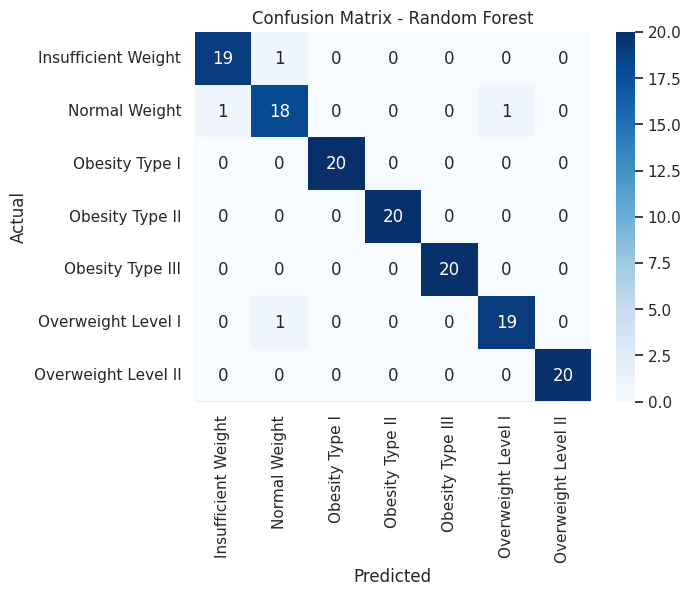

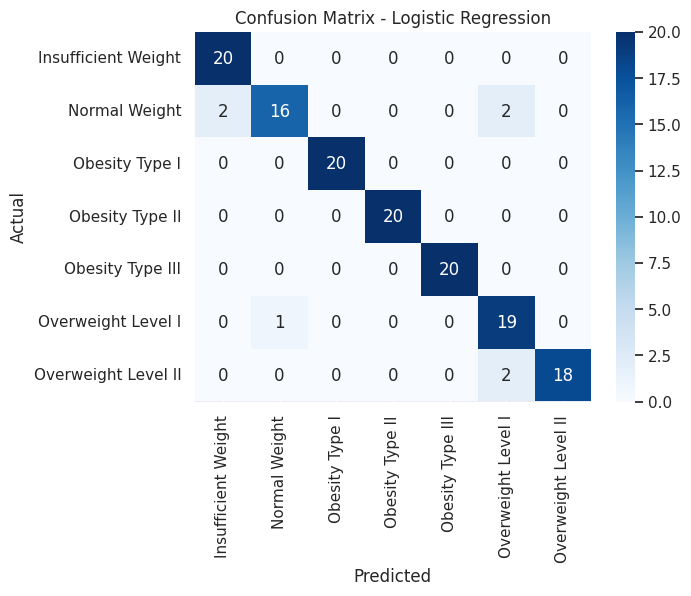

Classification Report - Random Forest:
                      precision    recall  f1-score   support

Insufficient Weight       0.95      0.95      0.95        20
      Normal Weight       0.90      0.90      0.90        20
     Obesity Type I       1.00      1.00      1.00        20
    Obesity Type II       1.00      1.00      1.00        20
   Obesity Type III       1.00      1.00      1.00        20
 Overweight Level I       0.95      0.95      0.95        20
Overweight Level II       1.00      1.00      1.00        20

           accuracy                           0.97       140
          macro avg       0.97      0.97      0.97       140
       weighted avg       0.97      0.97      0.97       140

Classification Report - Logistic Regression:
                      precision    recall  f1-score   support

Insufficient Weight       0.91      1.00      0.95        20
      Normal Weight       0.94      0.80      0.86        20
     Obesity Type I       1.00      1.00      1.00      

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(actual_obesity, predicted_obesity_rf, labels=label_encoders['Obesity'].classes_)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Obesity'].classes_, yticklabels=label_encoders['Obesity'].classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(actual_obesity, predicted_obesity_lr, labels=label_encoders['Obesity'].classes_)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Obesity'].classes_, yticklabels=label_encoders['Obesity'].classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report for detailed metrics
print("Classification Report - Random Forest:\n", classification_report(actual_obesity, predicted_obesity_rf))
print("Classification Report - Logistic Regression:\n", classification_report(actual_obesity, predicted_obesity_lr))


In [ ]:
# Import necessary libraries
import pandas as pd
import joblib

# Load the saved models and label encoders
rf_classifier = joblib.load('random_forest_obesity_model.pkl')
lr_classifier = joblib.load('logistic_regression_obesity_model.pkl')
label_encoders = joblib.load('label_encoders.pkl')

# Load the uploaded dataset
df = pd.read_csv('/content/drive/MyDrive/Transformed_ObesityDataSet.csv')

# Renaming columns for readability
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
              'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables',
              'Number of main meals', 'Consumption of food between meals', 'Smoke',
              'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency',
              'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity']

# Encode the features using saved label encoders
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoders[column].transform(df[column])

# Split the data into features and target variable
X = df.drop('Obesity', axis=1)  # Features
y = df['Obesity']  # Target variable

# Decode the actual labels from encoded values using the saved label encoders
actual_obesity = label_encoders['Obesity'].inverse_transform(y)

# Predict using the Random Forest model
predicted_obesity_rf = rf_classifier.predict(X)
predicted_obesity_rf = label_encoders['Obesity'].inverse_transform(predicted_obesity_rf)

# Predict using the Logistic Regression model
predicted_obesity_lr = lr_classifier.predict(X)
predicted_obesity_lr = label_encoders['Obesity'].inverse_transform(predicted_obesity_lr)

# Display the comparison of actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Output': actual_obesity,
    'Predicted RF Output': predicted_obesity_rf,
    'Predicted LR Output': predicted_obesity_lr
})

# Print the entire comparison DataFrame
print(comparison_df)

# Identify the indices of incorrect predictions for Random Forest
incorrect_rf_indices = comparison_df[comparison_df['Actual Output'] != comparison_df['Predicted RF Output']].index.tolist()

# Identify the indices of incorrect predictions for Logistic Regression
incorrect_lr_indices = comparison_df[comparison_df['Actual Output'] != comparison_df['Predicted LR Output']].index.tolist()

# Print the incorrect predictions
print("\n\nIncorrect Predictions for Random Forest:")
print(comparison_df.loc[incorrect_rf_indices])

print("\nIncorrect Predictions for Logistic Regression:")
print(comparison_df.loc[incorrect_lr_indices])


# Count the correct and incorrect predictions for Random Forest
correct_rf_count = (comparison_df['Actual Output'] == comparison_df['Predicted RF Output']).sum()
incorrect_rf_count = (comparison_df['Actual Output'] != comparison_df['Predicted RF Output']).sum()

# Count the correct and incorrect predictions for Logistic Regression
correct_lr_count = (comparison_df['Actual Output'] == comparison_df['Predicted LR Output']).sum()
incorrect_lr_count = (comparison_df['Actual Output'] != comparison_df['Predicted LR Output']).sum()

# Print the counts
print("\nCounts of Predictions:")
print(f"Random Forest - Correct: {correct_rf_count}, Incorrect: {incorrect_rf_count}")
print(f"Logistic Regression - Correct: {correct_lr_count}, Incorrect: {incorrect_lr_count}")

            Actual Output  Predicted RF Output  Predicted LR Output
0           Normal Weight        Normal Weight        Normal Weight
1           Normal Weight        Normal Weight        Normal Weight
2           Normal Weight        Normal Weight        Normal Weight
3      Overweight Level I   Overweight Level I  Overweight Level II
4     Overweight Level II  Overweight Level II  Overweight Level II
...                   ...                  ...                  ...
2106     Obesity Type III     Obesity Type III     Obesity Type III
2107     Obesity Type III     Obesity Type III     Obesity Type III
2108     Obesity Type III     Obesity Type III     Obesity Type III
2109     Obesity Type III     Obesity Type III     Obesity Type III
2110     Obesity Type III     Obesity Type III     Obesity Type III

[2111 rows x 3 columns]


Incorrect Predictions for Random Forest:
            Actual Output  Predicted RF Output  Predicted LR Output
13         Obesity Type I  Overweight Level II  

Null values in the dataset:
Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
Family History with Overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64

Class Distribution of 'Obesity':
 Obesity
Obesity Type I         351
Obesity Type III       324
Obesity Type II        297
Overweight Level I     290
Overweigh

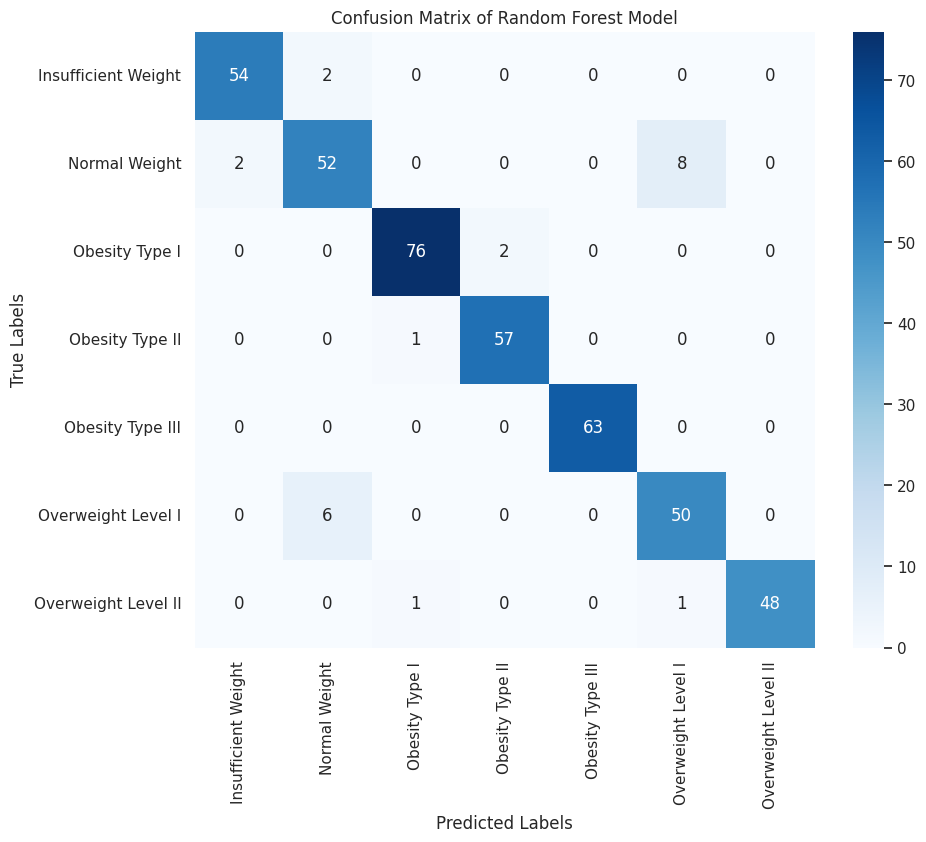

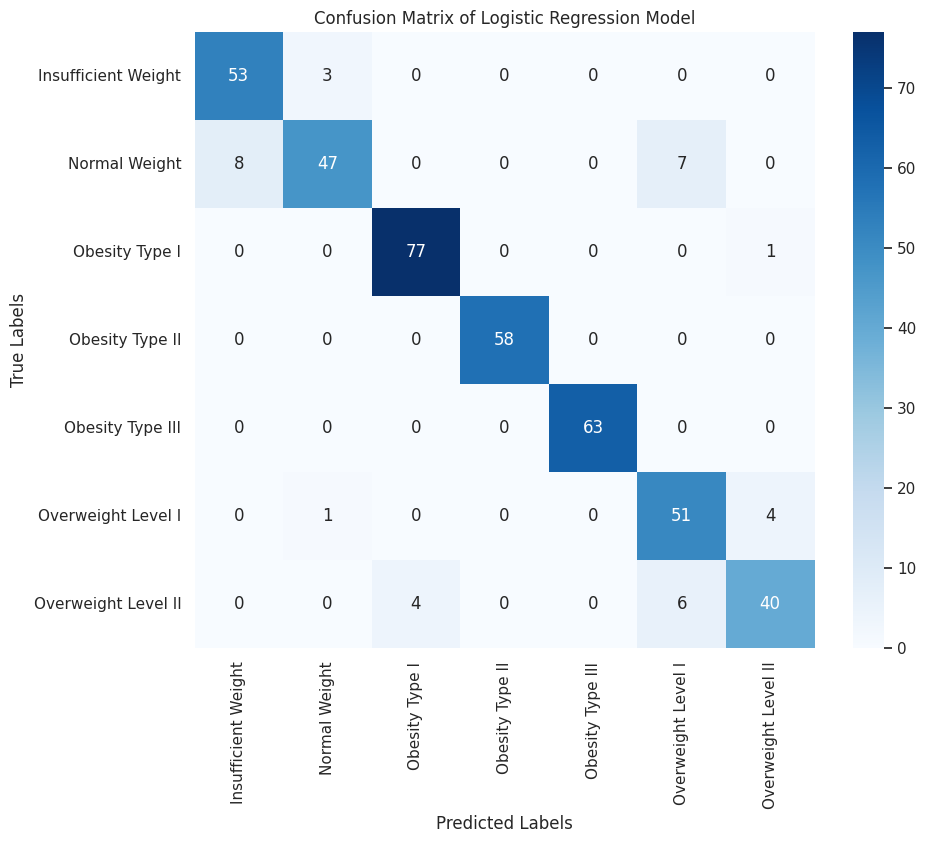

Predicted Obesity Category (Random Forest): Obesity Type II
Predicted Obesity Category (Logistic Regression): Obesity Type II


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')

# Renaming columns for readability
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
              'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables',
              'Number of main meals', 'Consumption of food between meals', 'Smoke',
              'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency',
              'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity']

# Replacing underscores with spaces in some columns
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))

# Converting Height to cm and rounding numerical values
df['Height'] = df['Height'] * 100
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(1)

# Checking for null values
print("Null values in the dataset:")
print(df.isnull().sum())

# Round relevant columns
for x in ['Frequency of consumption of vegetables', 'Number of main meals',
          'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    df[x] = df[x].apply(round)

# Replacing numerical values with categorical mappings
mapping0 = {1: 'Never', 2: 'Sometimes', 3: 'Always'}
mapping1 = {1: '1', 2: '2', 3: '3', 4: '3+'}
mapping2 = {1: 'Less than a liter', 2: 'Between 1 and 2 L', 3: 'More than 2 L'}
mapping3 = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
mapping4 = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}

df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(mapping0)
df['Number of main meals'] = df['Number of main meals'].replace(mapping1)
df['Consumption of water daily'] = df['Consumption of water daily'].replace(mapping2)
df['Physical activity frequency'] = df['Physical activity frequency'].replace(mapping3)
df['Time using technology devices'] = df['Time using technology devices'].replace(mapping4)

# Checking class imbalance for 'Obesity'
obesity_counts = df['Obesity'].value_counts()
print("\nClass Distribution of 'Obesity':\n", obesity_counts)

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Split the data into features and target variable
X = df.drop('Obesity', axis=1)  # Features
y = df['Obesity']  # Target variable

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier model with reduced complexity and class weights
rf_classifier = RandomForestClassifier(
    n_estimators=100,               # Increase number of trees
    max_depth=None,                  # Remove depth limitation
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',         # Use class weights to handle imbalance
    random_state=42
)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Logistic Regression Model
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)

# Make predictions on the training and test sets (Random Forest)
y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf = rf_classifier.predict(X_test)

# Make predictions on the training and test sets (Logistic Regression)
y_train_pred_lr = lr_classifier.predict(X_train)
y_test_pred_lr = lr_classifier.predict(X_test)

# Evaluate Random Forest Model
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
class_report_rf = classification_report(y_test, y_test_pred_rf, target_names=label_encoders['Obesity'].classes_)
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

# Evaluate Logistic Regression Model
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
class_report_lr = classification_report(y_test, y_test_pred_lr, target_names=label_encoders['Obesity'].classes_)
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)

# Print accuracy of both models
print(f"\nRandom Forest Training Accuracy: {train_accuracy_rf*100:.2f}%")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf*100:.2f}%")
print("\nRandom Forest Classification Report:\n", class_report_rf)

print(f"\nLogistic Regression Training Accuracy: {train_accuracy_lr*100:.2f}%")
print(f"Logistic Regression Testing Accuracy: {test_accuracy_lr*100:.2f}%")
print("\nLogistic Regression Classification Report:\n", class_report_lr)

# Confusion Matrix Heatmap for Random Forest
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Obesity'].classes_, yticklabels=label_encoders['Obesity'].classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Random Forest Model")
plt.show()

# Confusion Matrix Heatmap for Logistic Regression
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Obesity'].classes_, yticklabels=label_encoders['Obesity'].classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Logistic Regression Model")
plt.show()

# Save the models and label encoders for future use
joblib.dump(rf_classifier, 'random_forest_obesity_model.pkl')
joblib.dump(lr_classifier, 'logistic_regression_obesity_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

# Function to make predictions for new input data
def predict_obesity(input_data, model):
    """
    Predicts the Obesity category for the given input data using the specified model.

    Parameters:
    input_data (list): A list of feature values in the same order as the dataset.
    model: Trained model (Random Forest or Logistic Regression).

    Returns:
    str: Predicted Obesity category.
    """
    # Convert the input data into a DataFrame
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Encode categorical variables in the input data using saved encoders
    for column in input_df.columns:
        if column in label_encoders:
            try:
                # Transform the input data using the corresponding label encoder
                input_df[column] = label_encoders[column].transform([input_df[column][0]])
            except ValueError as e:
                print(f"Error: {e}")
                print(f"'{input_df[column][0]}' is not a recognized category for column '{column}'.")

    # Make the prediction
    prediction = model.predict(input_df)

    # Return the decoded prediction
    return label_encoders['Obesity'].inverse_transform(prediction)[0]

# Updated input for prediction
new_input = ['Male', 21.6, 177.4, 116.2, 'yes', 'yes', 'Sometimes', '3', 'Sometimes', 'no',
             'Between 1 and 2 L', 'no', '1 or 2 days', '3–5 hours', 'Sometimes', 'Public Transportation']

# Make the prediction using Random Forest
predicted_obesity_rf = predict_obesity(new_input, rf_classifier)
print(f"Predicted Obesity Category (Random Forest): {predicted_obesity_rf}")

# Make the prediction using Logistic Regression
predicted_obesity_lr = predict_obesity(new_input, lr_classifier)
print(f"Predicted Obesity Category (Logistic Regression): {predicted_obesity_lr}")


Null values in the dataset:
Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
Family History with Overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64


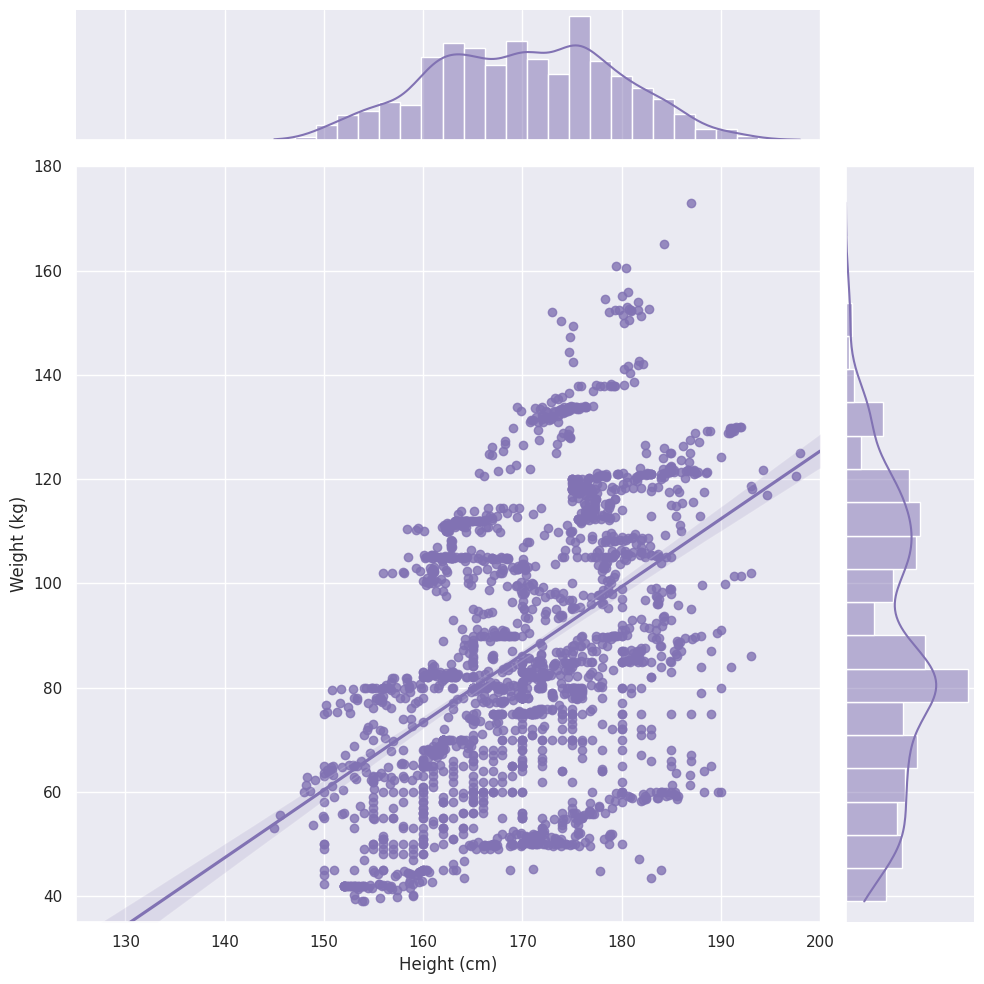

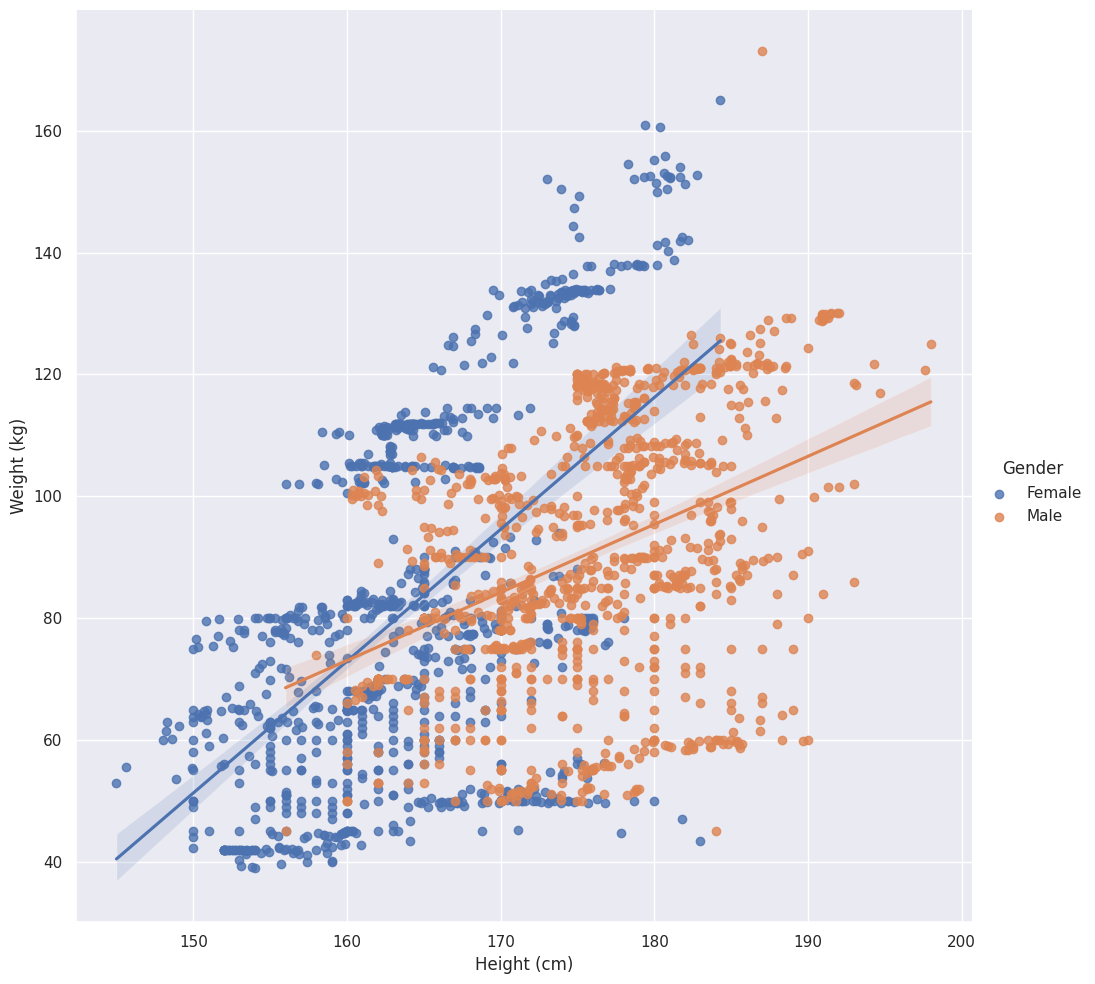

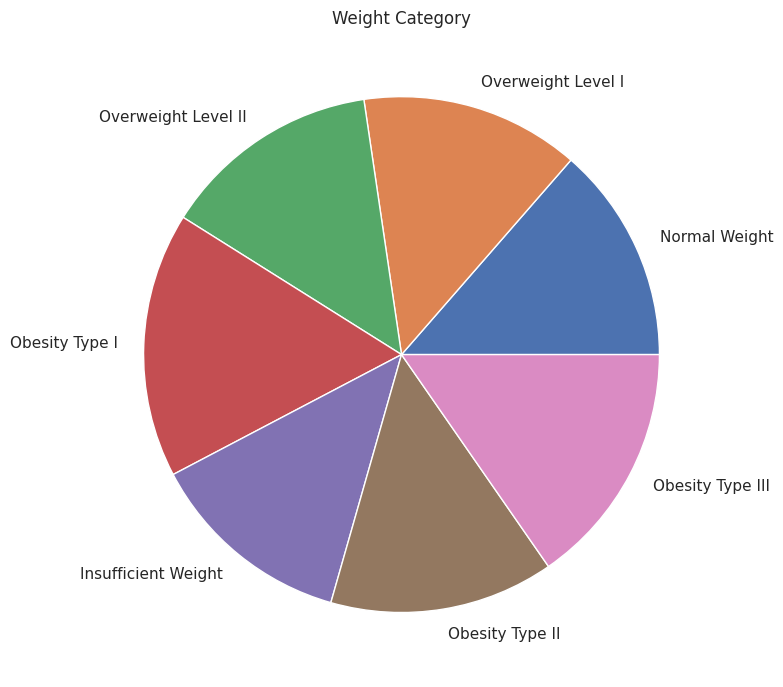

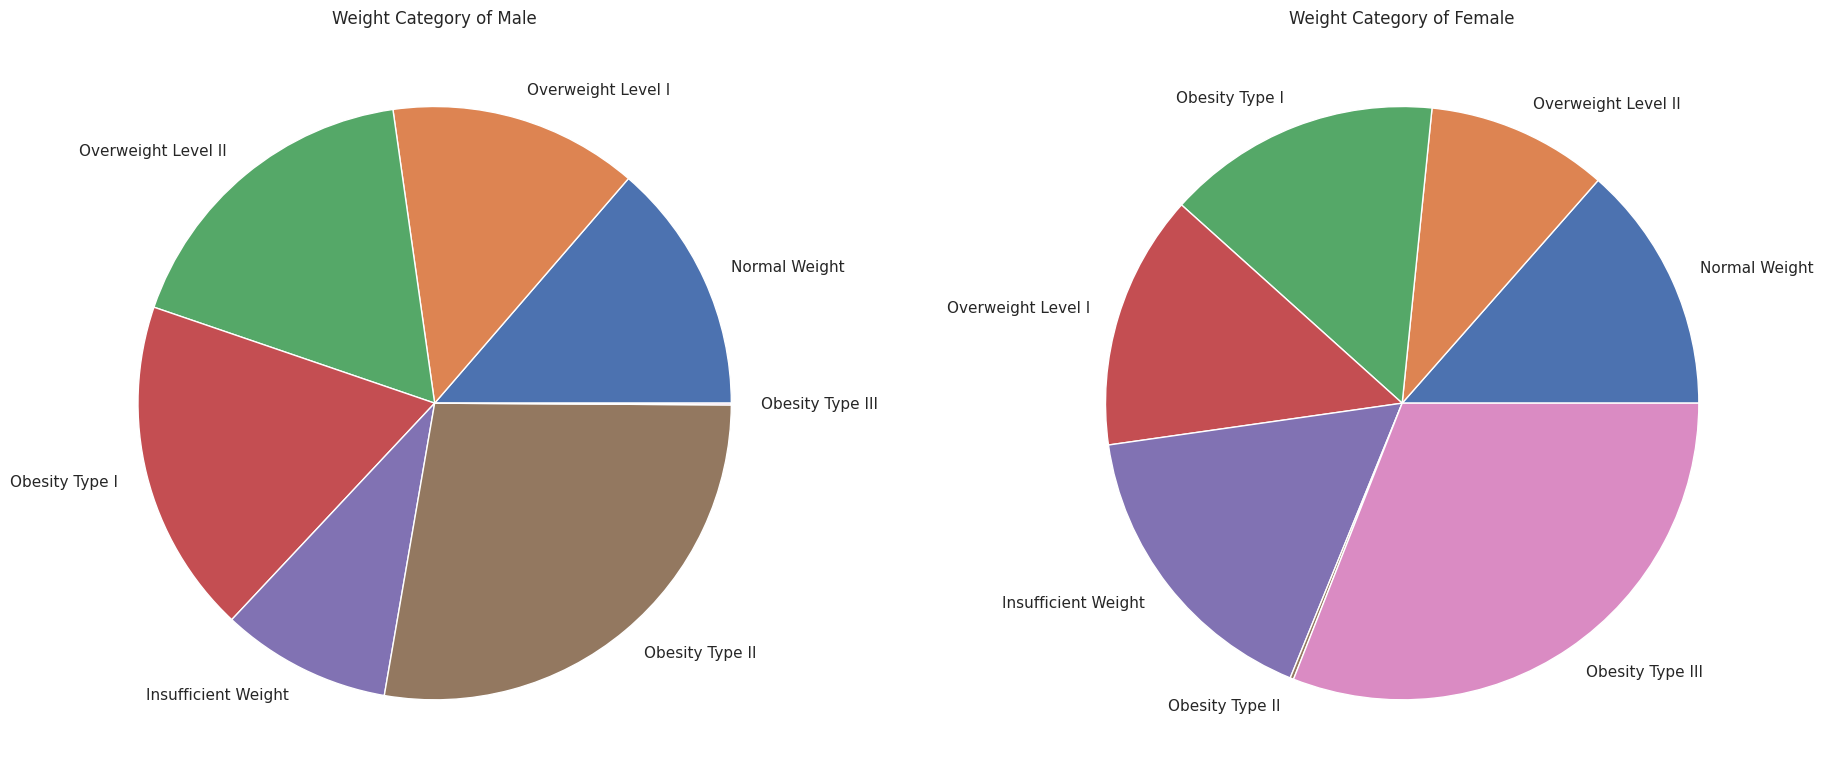

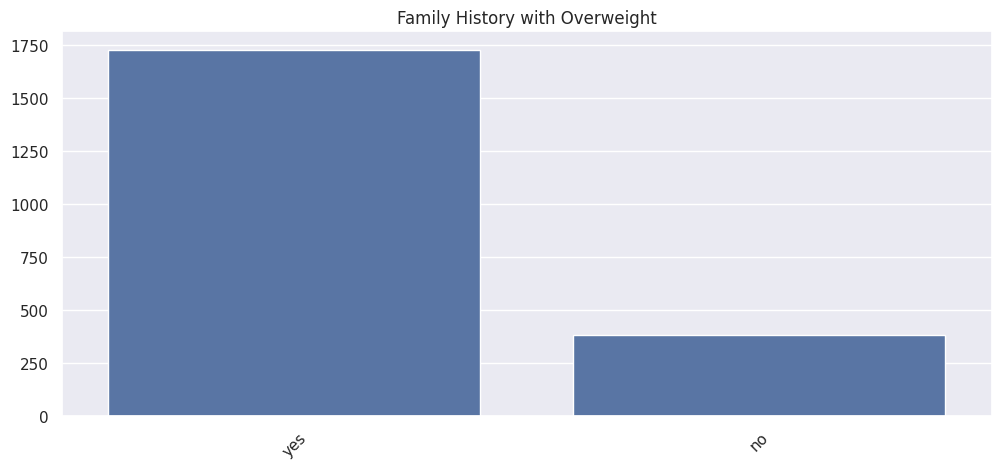

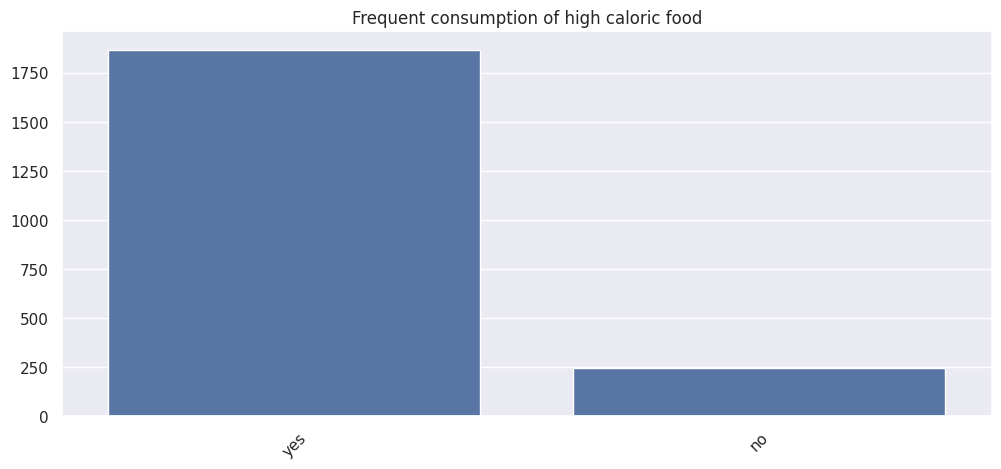

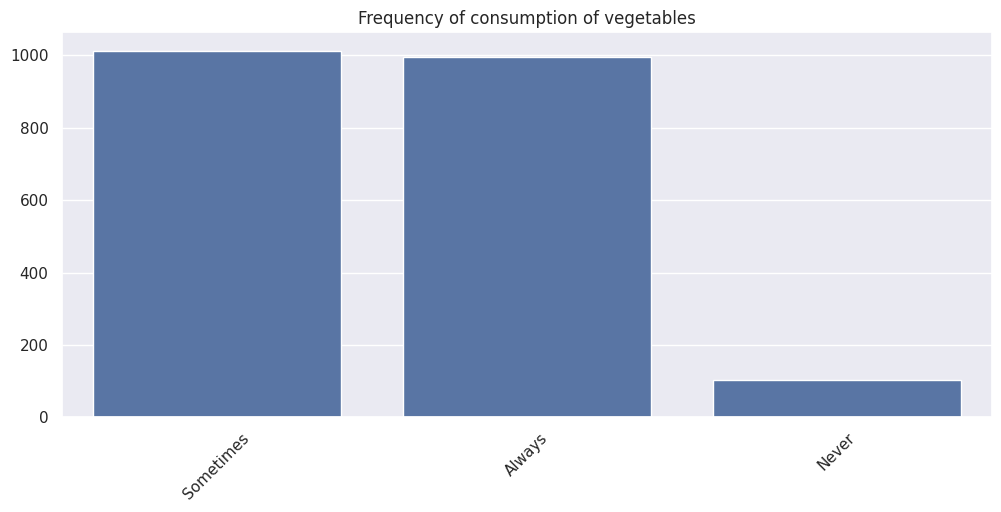

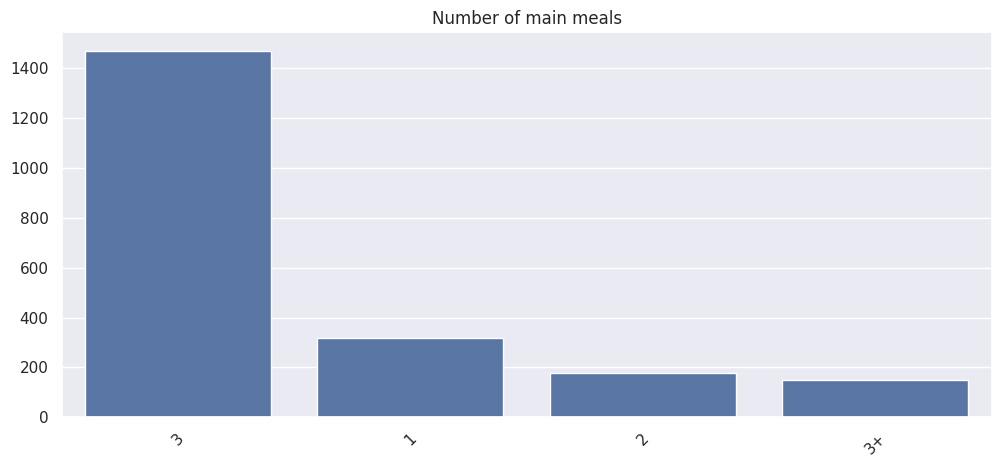

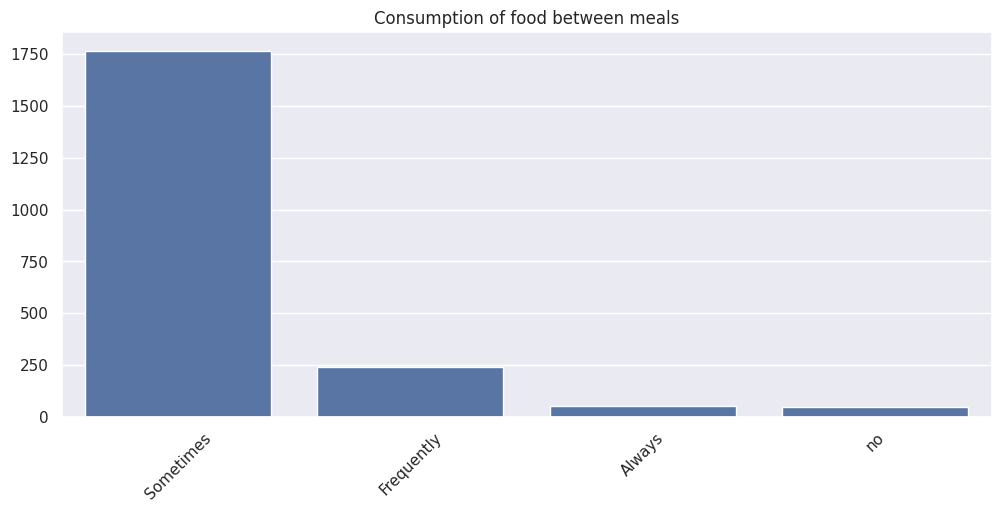

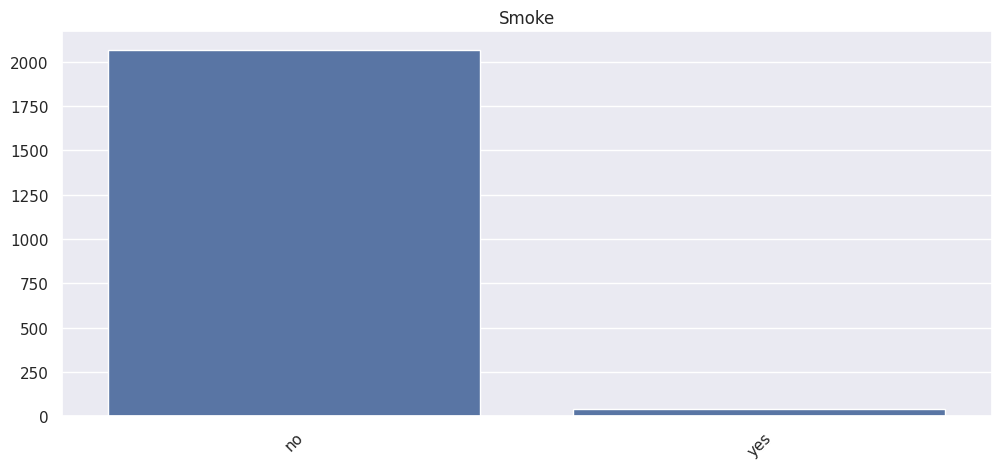

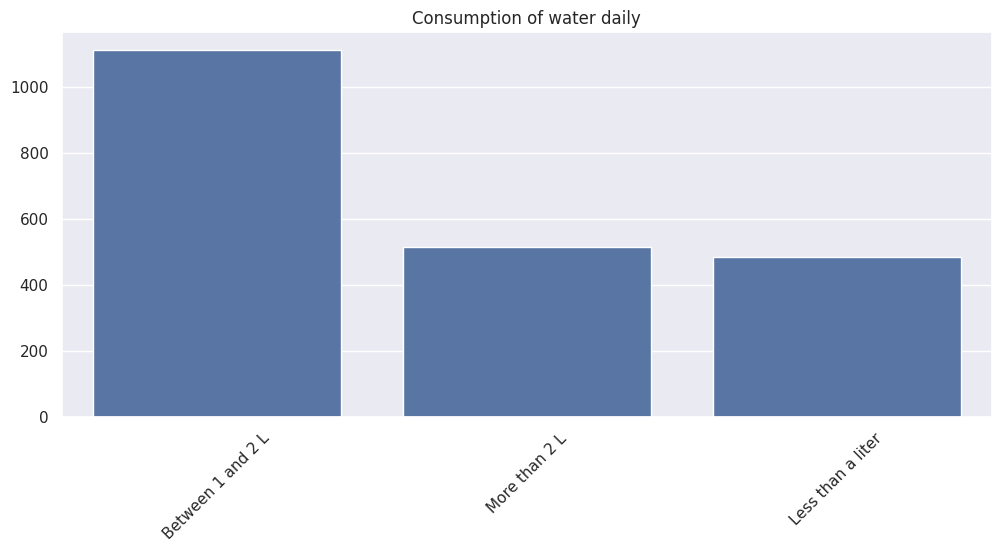

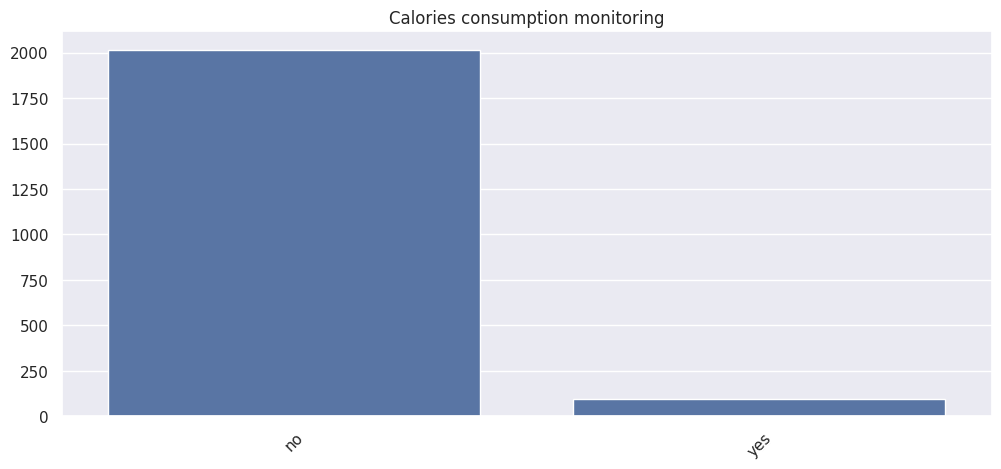

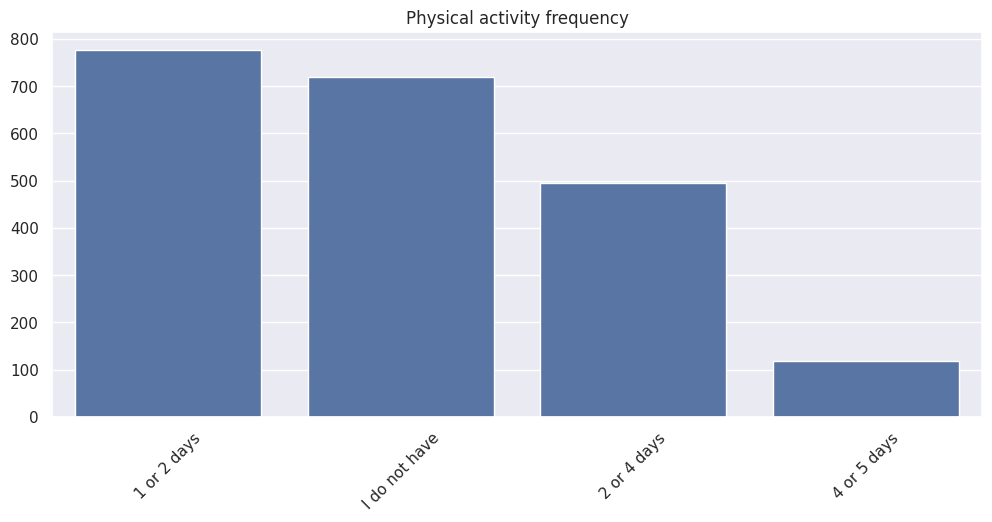

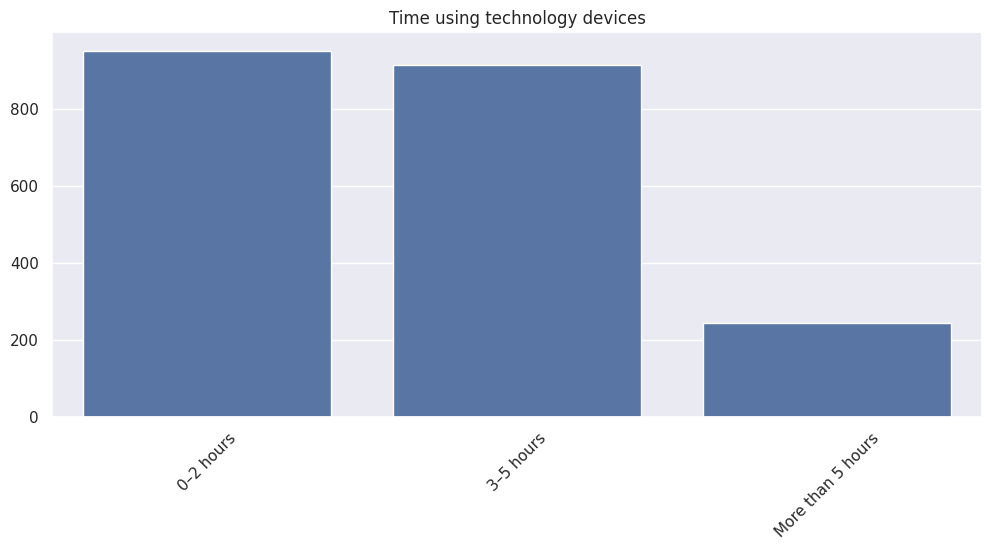

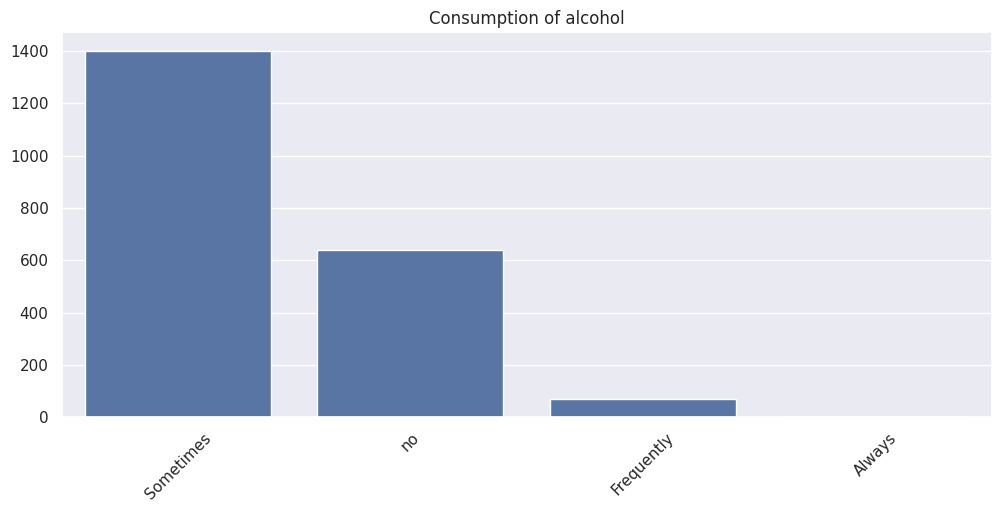

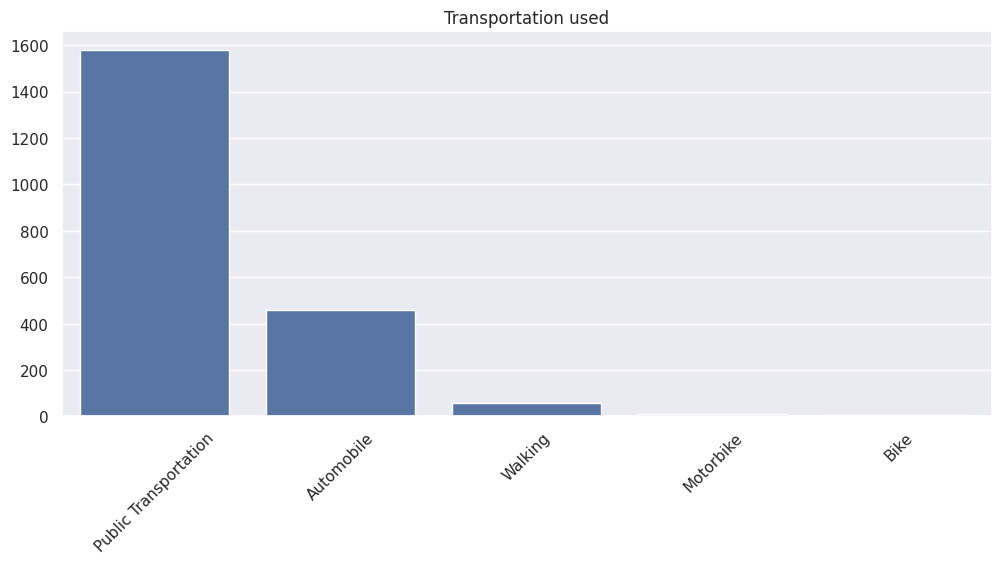


Class Distribution of 'Obesity':
 Obesity
Obesity Type I         351
Obesity Type III       324
Obesity Type II        297
Overweight Level I     290
Overweight Level II    290
Normal Weight          287
Insufficient Weight    272
Name: count, dtype: int64


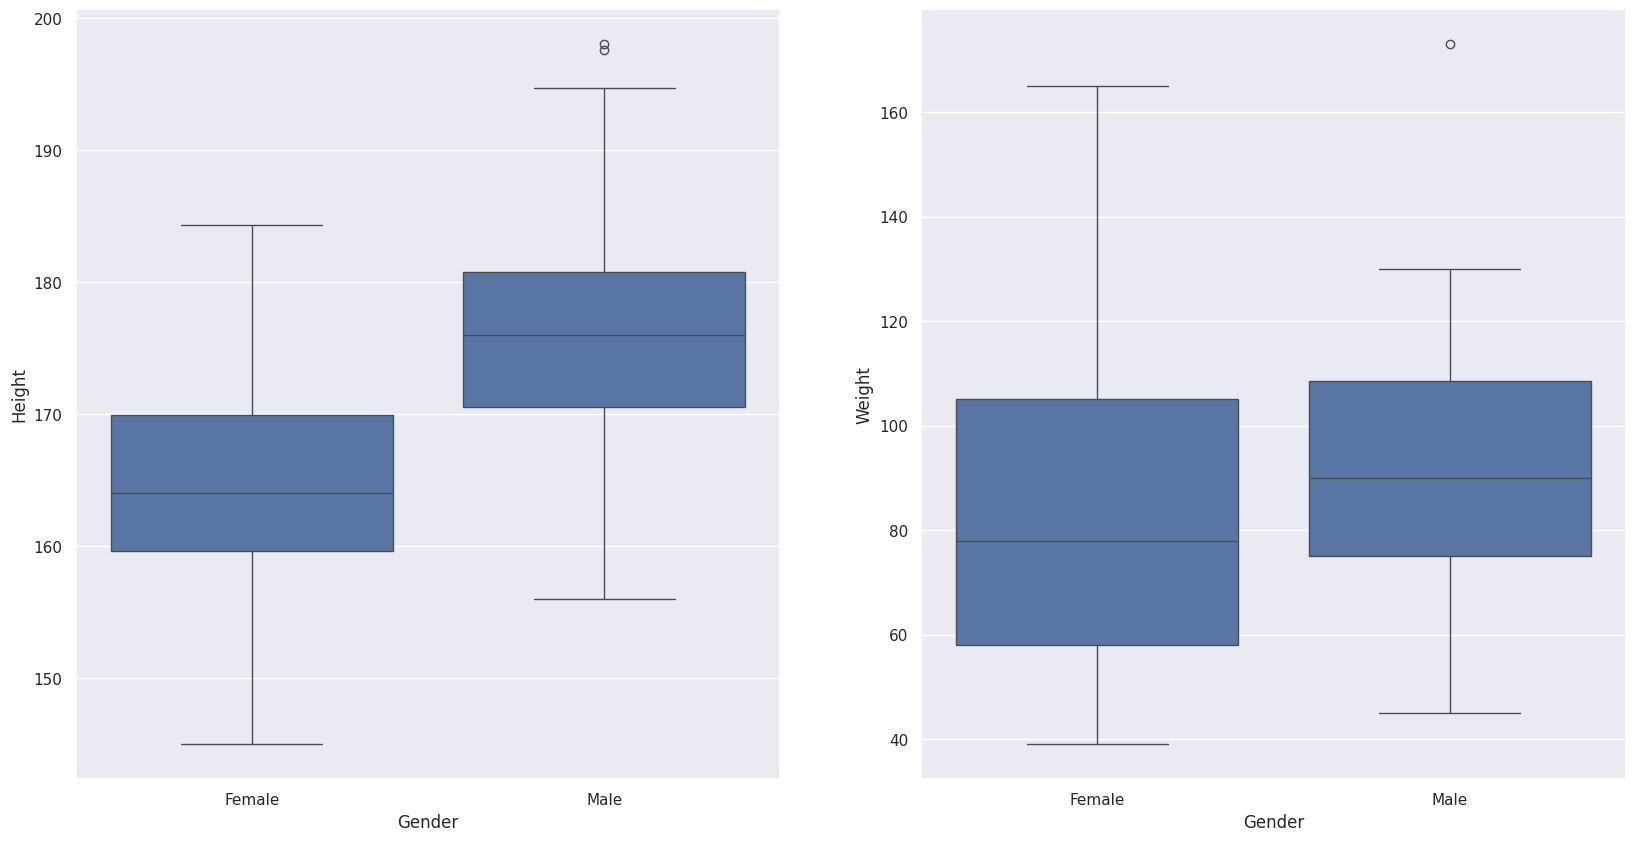

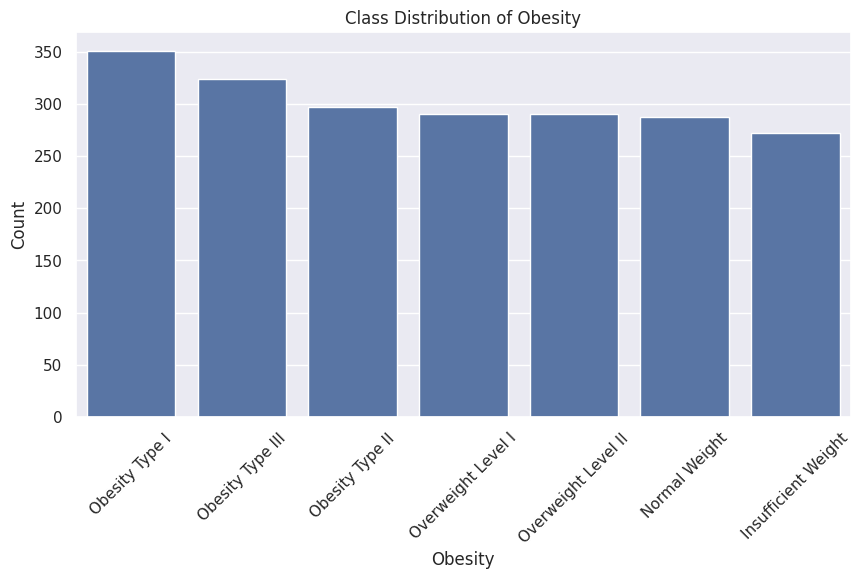


Random Forest Training Accuracy: 98.05%
Random Forest Testing Accuracy: 92.91%

Random Forest Classification Report (Test Set):
                      precision    recall  f1-score   support

Insufficient Weight       0.95      0.98      0.96        56
      Normal Weight       0.86      0.79      0.82        62
     Obesity Type I       0.96      0.95      0.95        78
    Obesity Type II       0.97      0.97      0.97        58
   Obesity Type III       1.00      1.00      1.00        63
 Overweight Level I       0.83      0.88      0.85        56
Overweight Level II       0.92      0.94      0.93        50

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423


Logistic Regression Training Accuracy: 92.71%
Logistic Regression Testing Accuracy: 91.96%

Logistic Regression Classification Report (Test Set):
                      precision    recall  f1-sco

['logistic_regression_model.pkl']

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib  # For saving the model
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')

# Renaming columns for readability
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
              'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables',
              'Number of main meals', 'Consumption of food between meals', 'Smoke',
              'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency',
              'Time using technology devices', 'Consumption of alcohol', 'Transportation used', 'Obesity']

# Replacing underscores with spaces in some columns
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))

# Converting Height to cm and rounding numerical values
df['Height'] = df['Height'] * 100
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(1)

# Checking for null values
print("Null values in the dataset:")
print(df.isnull().sum())

# Round relevant columns
for x in ['Frequency of consumption of vegetables', 'Number of main meals',
          'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    df[x] = df[x].apply(round)

# Replacing numerical values with categorical mappings
mapping0 = {1: 'Never', 2: 'Sometimes', 3: 'Always'}
mapping1 = {1: '1', 2: '2', 3: '3', 4: '3+'}
mapping2 = {1: 'Less than a liter', 2: 'Between 1 and 2 L', 3: 'More than 2 L'}
mapping3 = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
mapping4 = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}

df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(mapping0)
df['Number of main meals'] = df['Number of main meals'].replace(mapping1)
df['Consumption of water daily'] = df['Consumption of water daily'].replace(mapping2)
df['Physical activity frequency'] = df['Physical activity frequency'].replace(mapping3)
df['Time using technology devices'] = df['Time using technology devices'].replace(mapping4)

# Visualization: Height vs Weight
sns.set()
g = sns.jointplot(x="Height", y="Weight", data=df, kind="reg", truncate=False, xlim=(125, 200), ylim=(35, 180), color="m", height=10)
g.set_axis_labels("Height (cm)", "Weight (kg)")

# Visualization: Height vs Weight by Gender
g = sns.lmplot(x="Height", y="Weight", hue="Gender", height=10, data=df)
g.set_axis_labels("Height (cm)", "Weight (kg)")

# Pie Chart of Obesity
c = Counter(df['Obesity'])
fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct=None)
plt.title('Weight Category')
plt.tight_layout()

# Pie Charts by Gender
filt = df['Gender'] == 'Male'
c_m = Counter(df.loc[filt, 'Obesity'])
c_f = Counter(df.loc[~filt, 'Obesity'])

fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.pie([float(c_m[v]) for v in c_m], labels=[str(k) for k in c_m], autopct=None)
plt.title('Weight Category of Male')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.pie([float(c_f[v]) for v in c_f], labels=[str(k) for k in c_f], autopct=None)
plt.title('Weight Category of Female')
plt.tight_layout()

# Bar Plots for Eating and Exercise Habits
for a in df.columns[4:-1]:
    data = df[a].value_counts()
    values = df[a].value_counts().index.to_list()
    counts = df[a].value_counts().to_list()

    plt.figure(figsize=(12,5))
    ax = sns.barplot(x=values, y=counts)

    plt.title(a)
    plt.xticks(rotation=45)
    plt.show()

# Boxplots for Gender vs Height and Weight
sns.set()
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight', data=df)

# Checking class imbalance for 'Obesity'
obesity_counts = df['Obesity'].value_counts()
print("\nClass Distribution of 'Obesity':\n", obesity_counts)

# Plotting the class distribution for 'Obesity'
plt.figure(figsize=(10,5))
sns.barplot(x=obesity_counts.index, y=obesity_counts.values)
plt.title("Class Distribution of Obesity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Create a dictionary to store separate LabelEncoders for each categorical column
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # Store the encoder for each categorical column

# Split the data into features and target variable
X = df.drop('Obesity', axis=1)  # Features
y = df['Obesity']  # Target variable

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier model with reduced complexity
rf_classifier = RandomForestClassifier(
    n_estimators=50,                # Reduce the number of trees
    max_depth=10,                   # Limit the maximum depth of the trees
    max_features='sqrt',            # Limit the number of features used to split each node
    min_samples_split=4,            # Increase the minimum samples required to split a node
    min_samples_leaf=4,             # Increase the minimum samples required to be at a leaf node
    random_state=42
)
rf_classifier.fit(X_train, y_train)

# Logistic Regression Model
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)

# Make predictions on the training and test sets (Random Forest)
y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf = rf_classifier.predict(X_test)

# Make predictions on the training and test sets (Logistic Regression)
y_train_pred_lr = lr_classifier.predict(X_train)
y_test_pred_lr = lr_classifier.predict(X_test)

# Evaluate Random Forest Model
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
class_report_rf = classification_report(y_test, y_test_pred_rf, target_names=label_encoders['Obesity'].classes_)
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

# Evaluate Logistic Regression Model
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
class_report_lr = classification_report(y_test, y_test_pred_lr, target_names=label_encoders['Obesity'].classes_)
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)

# Print accuracy of both models
print(f"\nRandom Forest Training Accuracy: {train_accuracy_rf*100:.2f}%")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf*100:.2f}%")
print("\nRandom Forest Classification Report (Test Set):\n", class_report_rf)

print(f"\nLogistic Regression Training Accuracy: {train_accuracy_lr*100:.2f}%")
print(f"Logistic Regression Testing Accuracy: {test_accuracy_lr*100:.2f}%")
print("\nLogistic Regression Classification Report (Test Set):\n", class_report_lr)

# Print classification report for training set (Random Forest)
print("\nRandom Forest Classification Report (Training Set):\n", classification_report(y_train, y_train_pred_rf, target_names=label_encoders['Obesity'].classes_))

# Print classification report for training set (Logistic Regression)
print("\nLogistic Regression Classification Report (Training Set):\n", classification_report(y_train, y_train_pred_lr, target_names=label_encoders['Obesity'].classes_))

# Saving the models
joblib.dump(rf_classifier, 'random_forest_model.pkl')
joblib.dump(lr_classifier, 'logistic_regression_model.pkl')


## **Seperately printing the TP, TN, FP, FN**

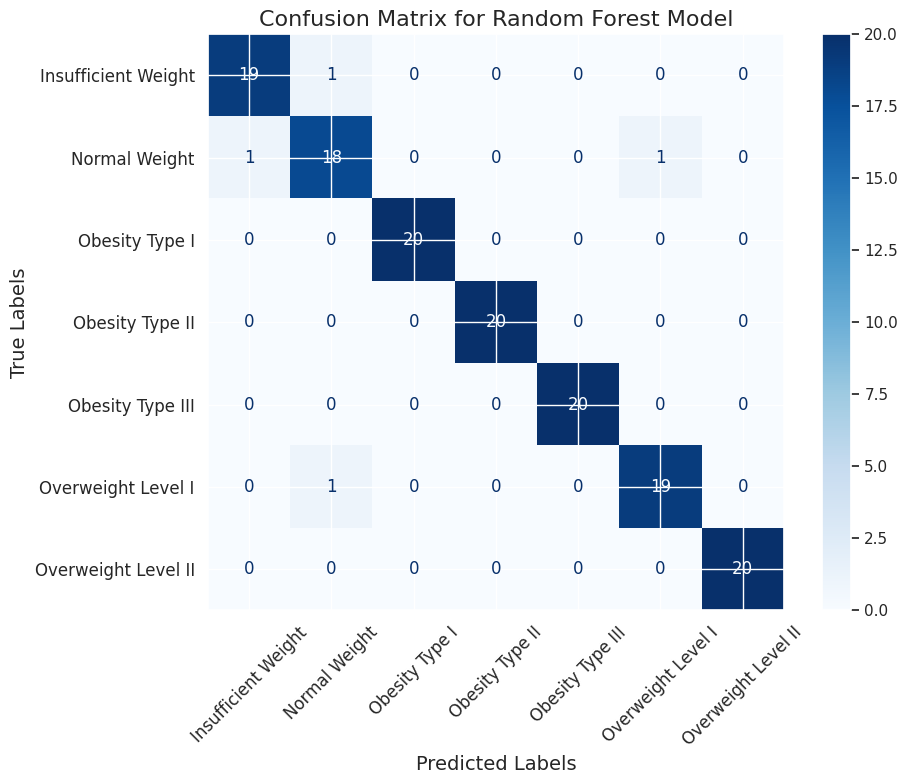


Class 'Insufficient Weight':
  True Positives (TP): 19
  False Positives (FP): 1
  False Negatives (FN): 1
  True Negatives (TN): 119

Class 'Normal Weight':
  True Positives (TP): 18
  False Positives (FP): 2
  False Negatives (FN): 2
  True Negatives (TN): 118

Class 'Obesity Type I':
  True Positives (TP): 20
  False Positives (FP): 0
  False Negatives (FN): 0
  True Negatives (TN): 120

Class 'Obesity Type II':
  True Positives (TP): 20
  False Positives (FP): 0
  False Negatives (FN): 0
  True Negatives (TN): 120

Class 'Obesity Type III':
  True Positives (TP): 20
  False Positives (FP): 0
  False Negatives (FN): 0
  True Negatives (TN): 120

Class 'Overweight Level I':
  True Positives (TP): 19
  False Positives (FP): 1
  False Negatives (FN): 1
  True Negatives (TN): 119

Class 'Overweight Level II':
  True Positives (TP): 20
  False Positives (FP): 0
  False Negatives (FN): 0
  True Negatives (TN): 120


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have the actual labels and predictions for Random Forest
# actual_obesity, predicted_obesity_rf

# Calculate confusion matrix for Random Forest
cm_rf = confusion_matrix(actual_obesity, predicted_obesity_rf, labels=label_encoders['Obesity'].classes_)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(10, 8))  # Set the figure size
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoders['Obesity'].classes_)
disp_rf.plot(cmap=plt.cm.Blues, ax=plt.gca())  # Plot on current axis

# Set titles and labels
plt.title('Confusion Matrix for Random Forest Model', fontsize=16)  # Title
plt.xticks(rotation=45, fontsize=12)  # Rotate x-tick labels
plt.yticks(fontsize=12)  # Y-tick labels
plt.xlabel('Predicted Labels', fontsize=14)  # X-axis label
plt.ylabel('True Labels', fontsize=14)  # Y-axis label
plt.tight_layout()  # Adjust layout
plt.show()

# Calculate True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN) for each class
tp = cm_rf.diagonal()  # True Positives are on the diagonal of the confusion matrix
fp = cm_rf.sum(axis=0) - tp  # False Positives are the column sums minus the diagonal
fn = cm_rf.sum(axis=1) - tp  # False Negatives are the row sums minus the diagonal
tn = cm_rf.sum() - (fp + fn + tp)  # True Negatives are the rest of the matrix

# Display TP, FP, FN, TN for each class
for i, class_label in enumerate(label_encoders['Obesity'].classes_):
    print(f"\nClass '{class_label}':")
    print(f"  True Positives (TP): {tp[i]}")
    print(f"  False Positives (FP): {fp[i]}")
    print(f"  False Negatives (FN): {fn[i]}")
    print(f"  True Negatives (TN): {tn[i]}")


## **Printing TP, TN, FP, FN inside the matrix**

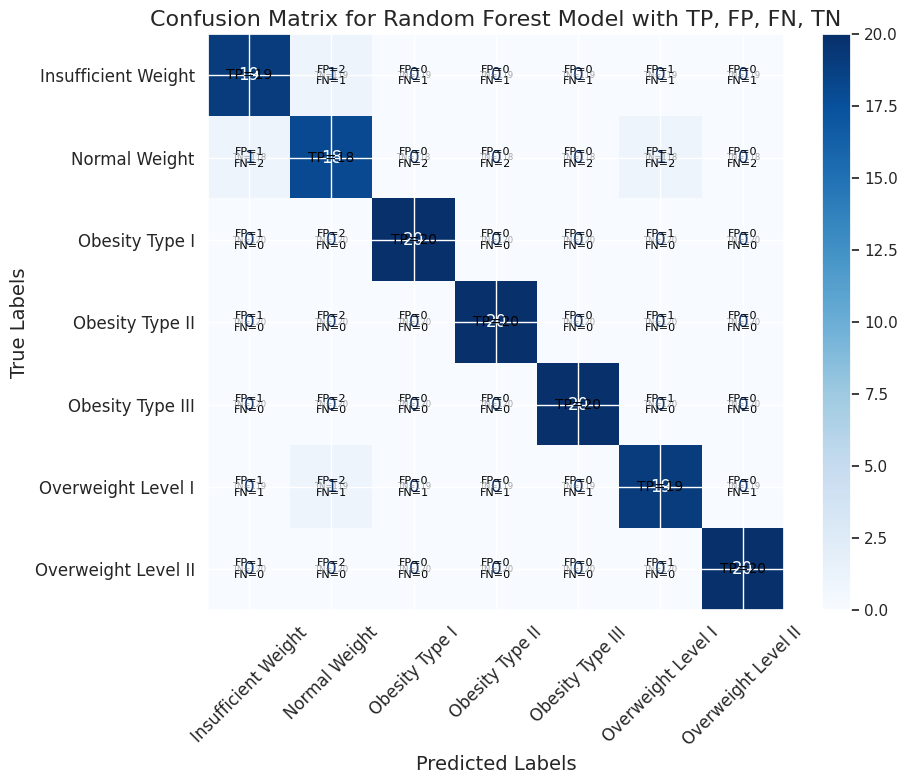

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the actual labels and predictions for Random Forest
# actual_obesity, predicted_obesity_rf

# Calculate confusion matrix for Random Forest
cm_rf = confusion_matrix(actual_obesity, predicted_obesity_rf, labels=label_encoders['Obesity'].classes_)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(10, 8))  # Set the figure size
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoders['Obesity'].classes_)
disp_rf.plot(cmap=plt.cm.Blues, ax=plt.gca(), values_format='d')  # Plot on current axis

# Set titles and labels
plt.title('Confusion Matrix for Random Forest Model with TP, FP, FN, TN', fontsize=16)  # Title
plt.xticks(rotation=45, fontsize=12)  # Rotate x-tick labels
plt.yticks(fontsize=12)  # Y-tick labels
plt.xlabel('Predicted Labels', fontsize=14)  # X-axis label
plt.ylabel('True Labels', fontsize=14)  # Y-axis label
plt.tight_layout()  # Adjust layout

# Calculate True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN)
tp = cm_rf.diagonal()
fp = cm_rf.sum(axis=0) - tp
fn = cm_rf.sum(axis=1) - tp
tn = cm_rf.sum() - (fp + fn + tp)

# Annotate the confusion matrix with TP, FP, FN, and TN values
for i in range(len(label_encoders['Obesity'].classes_)):
    for j in range(len(label_encoders['Obesity'].classes_)):
        if i == j:
            # True Positives (TP) - Diagonal elements
            plt.text(j, i, f"TP={tp[i]}", ha="center", va="center", color="black", fontsize=10)
        else:
            # False Positives (FP) - Non-diagonal elements in row j
            plt.text(j, i, f"FP={fp[j]}\nFN={fn[i]}", ha="center", va="center", color="black", fontsize=8)
            # True Negatives (TN) - Remaining elements in the cell
            plt.text(j, i, f"TN={tn[i]}", ha="center", va="center", color="gray", fontsize=6, alpha=0.7)

plt.show()
